# Problem Statement

• **DOMAIN**: Industrial safety. NLP based Chatbot.

• **CONTEXT**:  

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION**:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

*Columns description*:  

‣ **Data**: timestamp or time/date information

‣ **Countries**: which country the accident occurred (anonymised)

‣ **Local**: the city where the manufacturing plant is located (anonymised)

‣ **Industry sector**: which sector the plant belongs to

‣ **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ **Genre**: if the person is male of female

‣ **Employee or Third Party**: if the injured person is an employee or a third party

‣ **Critical Risk**: some description of the risk involved in the accident

‣ **Description**: Detailed description of how the accident happened.



**PROJECT OBJECTIVE:**

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.



• **PROJECT TASK:** [ Score: 100 points]

1. **Milestone 1: [ Score: 40 points ]**

‣ Input: Context and Dataset

‣ Process:  

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

‣ Submission: Interim report, Jupyter Notebook with all the steps in
Milestone-1


2. **Milestone 2: [ Score: 60 points ]**

‣ Input: Preprocessed output from Milestone-1

‣ Process:  

‣ Step 1: Design, train and test Neural networks classifiers [ 5 points ]

‣ Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]

‣ Step 3: Choose the best performing classifier and pickle it. [ 5 points ]

‣ Step 4: Final Report [40 Points]

‣ Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

3. **Milestone 3: [ Optional ]**

‣ Process:

‣ Step 1: Design a clickable UI based chatbot interface  

‣ Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface




## Milestone 1: [ Score: 40 points ]
‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

### Import Libraries

In [1]:
#Import Required Libraries
!pip install scikit-learn

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np

# To visualise data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To impute null or missing values
from sklearn.impute import SimpleImputer

# To load the natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Download required resources for nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

# To use regular expressions for manipulating text data
import re

# To create wordcloud
from wordcloud import WordCloud

# For n-grams
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# To apply TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To apply Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To import the ML Classifiers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# To assess the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# To convert categorical feature to numerical
from sklearn.preprocessing import LabelEncoder

# To import Pipeline
from imblearn.pipeline import Pipeline

# Import the zscore function from scipy.stats
from scipy.stats import zscore #

# Import the SMOTE class from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# For ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2


# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Step 1: Import the data

In [2]:
use_mount_drive = False
df = pd.DataFrame()
if use_mount_drive:
    from google.colab import drive
    drive.mount('/content/drive')
else:
  print("Mount Drive option is selected. Proceeding with runtime drive.")


Mount Drive option is selected. Proceeding with runtime drive.


In [3]:
# Import the data
if use_mount_drive:
  filepath = "/content/drive/MyDrive/PGP AIML/Capstone Project/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx"
  df = pd.read_excel(filepath)
else:
 df = pd.read_excel("Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx")

df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### Step 2: Data cleansing

#### Shape and Datatype

In [4]:
# shape of the data
print('The data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The data has 425 rows and 11 columns


In [5]:
# check data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


##### Insights -
* 'Unnamed: 0' column is record number which can be safely removed from the analysis
* Data, Countries, Genre and Employee or Third Party columns can be renamed as per the standards

In [6]:
#Dropping 0th column
df = df.drop(df.columns[0], axis=1)
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


#### Check for Null and Missing Values

In [7]:
#check the null or missing values
df.isnull().sum()

,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0
Description,0


In [8]:
# Check for NA values
na_columns = df.isna().any()
print(na_columns)

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool


In [9]:
# Check for empty/blank strings
empty_columns = (df == '').any()
print(empty_columns)

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool


##### Insights -
No Null, Missing or Empty values are found in any of the columns

#### Check for Duplicate Records

In [10]:
#Checking duplicate record
df.duplicated().sum()

7

In [11]:
# Displaying duplicate rows
duplicates = df[df.duplicated()]
duplicates

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"Team of the VMS Project performed soil collection on the Xixás target with 3 members. When the teams were moving from one collection point to another, Mr. Fabio was ahead of the team, stinging behind Robson and Manoel da Silva. near the collection point were surprised by a swarm of bees that was inside a I play near the ground, with no visibility in the woods and no hissing noise. Fabio passed by the stump, but Robson and Manoel da Silva were attacked by the bees. Robson had a sting in his left arm over his uniform and Manoel da Silva had a prick in his lip as his screen ripped as he tangled in the branches during the escape."
397,2017-05-23,Country

In [12]:
# comapring the description
index_3_description = duplicates.iloc[3]['Description']
index_4_description = duplicates.iloc[4]['Description']
if(index_3_description == index_4_description):
    print("True Duplicate")
else:
    print("False Duplicate")

True Duplicate


In [13]:
#Let's now drop duplicate rows from datframe present at index 346.
df = df.drop(index=346)

# Displaying duplicate post dropping true duplicate
duplicates = df[df.duplicated()]
duplicates.head(10)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"Team of the VMS Project performed soil collection on the Xixás target with 3 members. When the teams were moving from one collection point to another, Mr. Fabio was ahead of the team, stinging behind Robson and Manoel da Silva. near the collection point were surprised by a swarm of bees that was inside a I play near the ground, with no visibility in the woods and no hissing noise. Fabio passed by the stump, but Robson and Manoel da Silva were attacked by the bees. Robson had a sting in his left arm over his uniform and Manoel da Silva had a prick in his lip as his screen ripped as he tangled in the branches during the escape."
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,"In moments when the 02 collaborators carried out the inspection of the conveyor belt No. 3 from the tail pulley when they were at the height of the load polymer No. 372, the Maslucan collaborator heard a noise where note that the belt was moving towards the tail pulley, 4 ""fragmentos mineral fragments are projected towards the access of the ramp impacting the 2 collaborators, being evacuated to the medical post."


##### Insights -
* When initially checkd 7 records seems to be duplicate records.
* However when descriptions were comapred only 1 record found to duplicated and same has been removed from the analysis

#### Standardizing the column names

In [14]:
# Rename required column names to standardize the data
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Employee or Third Party':'Employee Type', 'Genre':'Gender'}, inplace=True)

# Get the top 2 rows
df.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."


#### Extracting Features from Date Column

In [15]:
# Extract Features from the Date column
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['Year-Month'] = df['Date'].dt.strftime('%Y-%m')

df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,Year-Month
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,1,Friday,2016-01
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,2,Saturday,2016-01
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,6,Wednesday,2016-01


##### Insights -
Following features were extracted from the data column

*   Year
*   Month
*   Day
*   Weekday


### Step 3: Exploratory Data Analysis

In [ ]:
#unique values present in each attribute except the Description
for column in df.columns:
    if column not in ['Description', 'Date']:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'Country':
['Country_01' 'Country_02' 'Country_03']

Unique values in 'Local':
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Unique values in 'Industry Sector':
['Mining' 'Metals' 'Others']

Unique values in 'Accident Level':
['I' 'IV' 'III' 'II' 'V']

Unique values in 'Potential Accident Level':
['IV' 'III' 'I' 'II' 'V' 'VI']

Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Employee Type':
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values in 'Critical Risk':
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projectio

* There are records of accidents from 1st Jan 2016 to 9th July 2017.

* Plant is located at 12 cities which belongs to 3 countries.

* Data available is related to 3 Industry Sectors like Metals, Mining and others.

* Each accident can be classified into any one of the five Accident Level. Higher the Accident Level Higher the severity.

* Accidents are related to both Male and Female.

* Employees are classified as into three categories such as Employee, Third Party and Third Party (Remote).

* Critical Risk feature contains most unique values and may be it can explain the Accident Level along with the Description.

#### Univariate Analysis

In [ ]:
#Function To Create Pier Chart Metrics for the appropraite categorical columns from the supplied Data Frame
def df_pie_chart_metrix(df):
  cat_cols = list(df.select_dtypes(include='object').columns)
  pie_cols = []
  for column in cat_cols:
    if df[column].nunique() < 5: #if we have more than 5 labels in categorical column it will not be appropriate to visualize it in pie chart.
      pie_cols.append(column)

  columns = 2 #fixing the number of columns so that Pie Chart Metrics would look good visually
  rows = 2

  fig, ax = plt.subplots(rows, columns , figsize=(8, 8))
  for i in range(0,rows) :
    for j in range(0,columns) :
      ax[i, j].pie(
          df[pie_cols[i*columns+j]].value_counts(),
          labels=df[pie_cols[i*columns+j]].unique(),
          autopct='%1.1f%%',
          textprops={'size': 'smaller'},
          shadow=True,
          colors=sns.color_palette('Set2')
          )
      ax[i, j].set_title(pie_cols[i*columns+j])
  plt.tight_layout()
  plt.show()

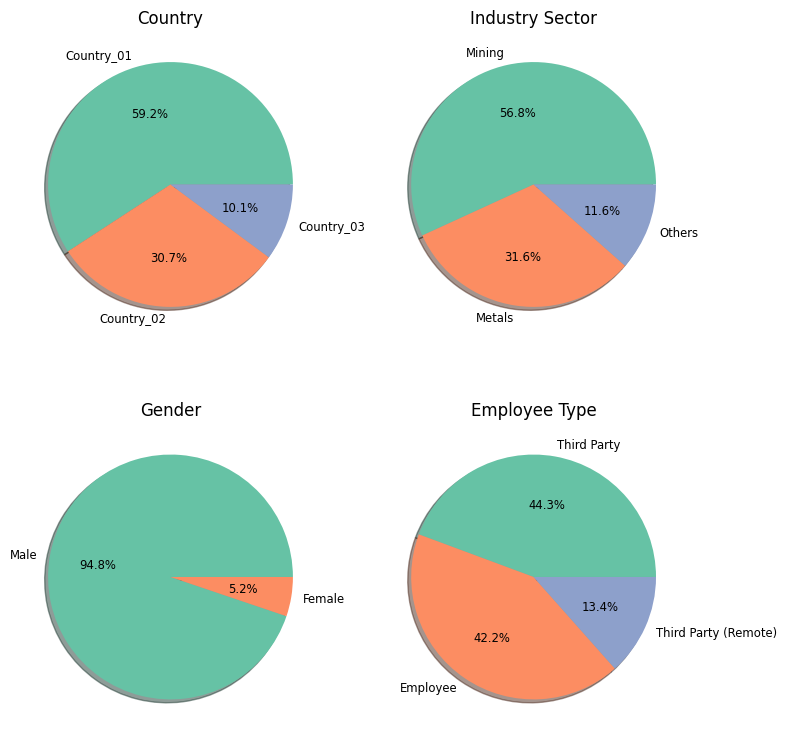

In [ ]:
df_pie_chart_metrix(df)

In [ ]:
def bar_chart(df, col):
    # Prepare data
    df_counts = df[col].value_counts().reset_index()
    df_counts.columns = [col, 'count']

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bar chart
    bars = ax.bar(df_counts[col], df_counts['count'], color=sns.color_palette('Set2', n_colors=len(df_counts)))

    # Adding text labels above bars (outside)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,  # Positioned slightly above the bar
                f'{int(height)}', ha='center', fontsize=8, fontweight='bold')

    # Labels and title
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col}")
    ax.set_xticks(range(len(df_counts)))
    ax.set_xticklabels(df_counts[col], rotation=45, ha='right')  # Rotate for readability

    plt.tight_layout()
    plt.show()

# Example usage:
# bar_chart(df)


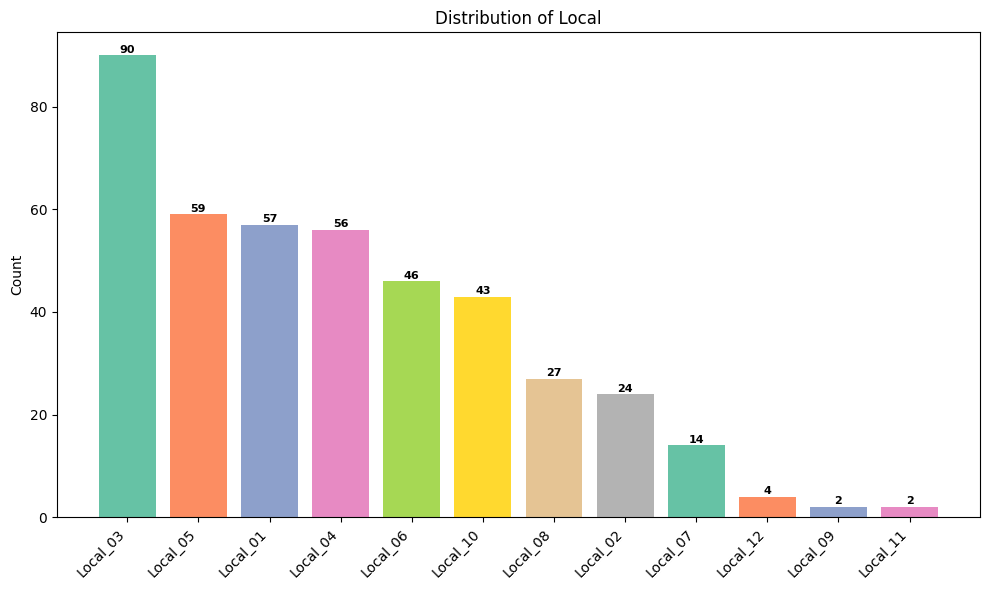

In [ ]:
bar_chart(df,'Local')

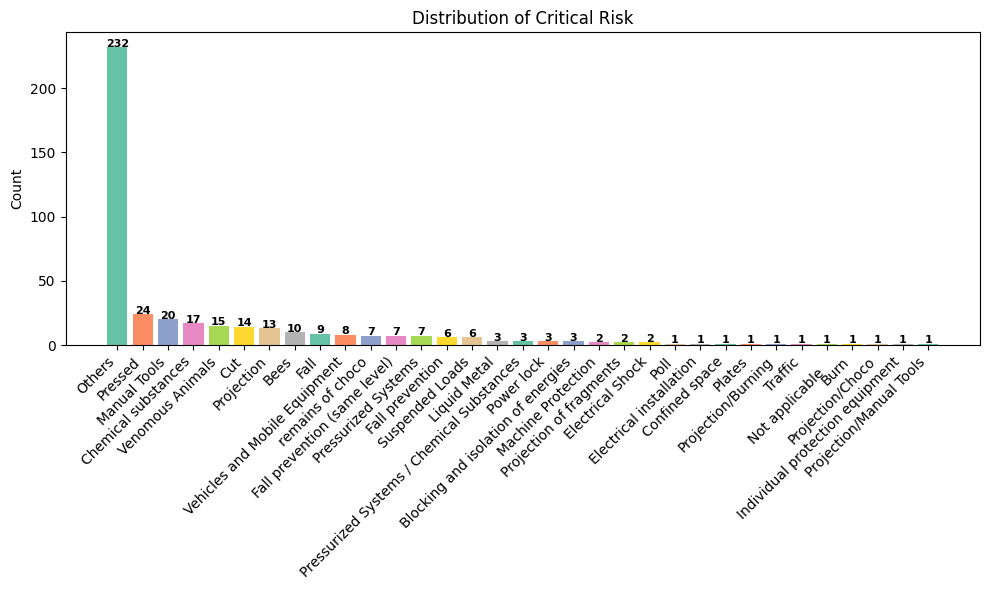

In [ ]:
bar_chart(df,'Critical Risk')

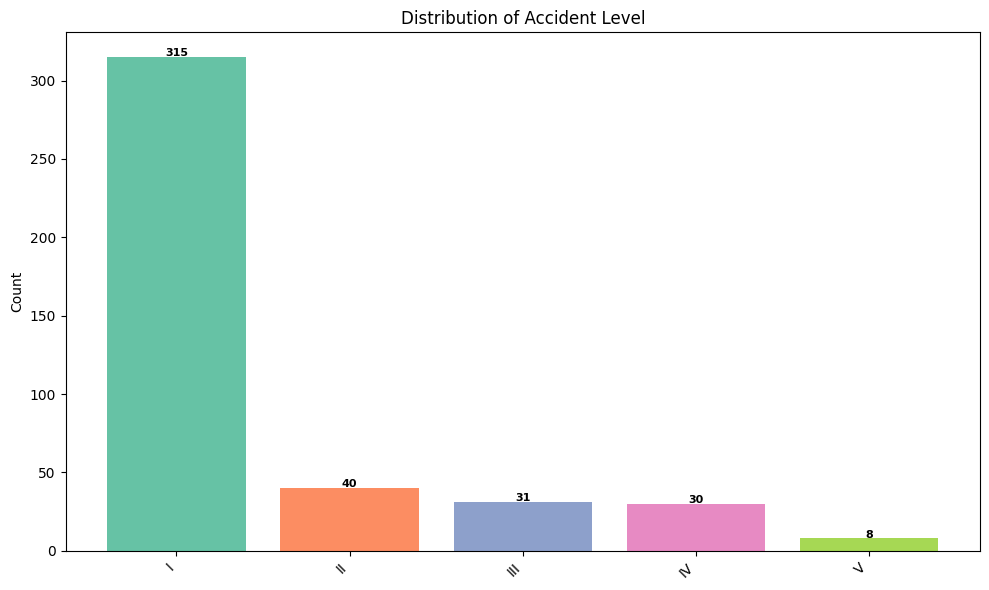

In [ ]:
bar_chart(df,'Accident Level')

##### Insights -
* Most Accident happened in Country - 01.

* Mining Industry sector is prone to the Accidents as 57% of accidents are related to Mining Industry

* Nearly 95% of the accidents were caused by Male Employeed. However as data is relaated to Mining and Metal Industry this percentage seems ok as most of workers will be Male.

* Employees on the payroll and Third Party Employee equally contributes to the number of accidents. Very few accidents were caused by the Remote Emplyees.

* Least accident happened in local-9 and local 11 which is 2.

* For more than half of the Accident the Critical Risk is mentioned as others. Which means for most of the accident critical risk involved is too large or can not be determined. Here SME can help the industry to assess the critical risk involved in the accident.

* Out of 424 accidents 315 accidents are of accident level 1 which means nearly 75% of the accidents are of least severity

* From Machine Learning perspective clearly there is significant class imbalance in the target variable.

#### Bi-Variate Analysis

In [ ]:
def stacked_bar_chart(df, column):
    # Prepare data
    df_counts = df.groupby([column, 'Accident Level']).size().unstack(fill_value=0)
    categories = df_counts.index
    accident_levels = df_counts.columns

    # Define color map
    colors = plt.cm.Set2(np.linspace(0, 1, len(accident_levels)))

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Initialize bottom array for stacking
    bottom = np.zeros(len(categories))

    # Plot each stack
    for i, level in enumerate(accident_levels):
        bars = ax.bar(categories, df_counts[level], bottom=bottom, label=level, color=colors[i])

        # Adding text labels with clutter handling
        for bar in bars:
            height = bar.get_height()
            if height > 7:  # Only display if value is large enough to fit text
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height / 2,  # Position inside bar
                        f'{int(height)}', ha='center', fontsize=8, color='black', fontweight='bold')

        # Update bottom for next stack
        bottom += df_counts[level].values

    # Labels and title
    ax.set_ylabel("Count")
    ax.set_title(f"Stacked Bar Chart of {column} vs. Accident Level")
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, ha='right')

    # Legend outside
    ax.legend(title="Accident Level", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


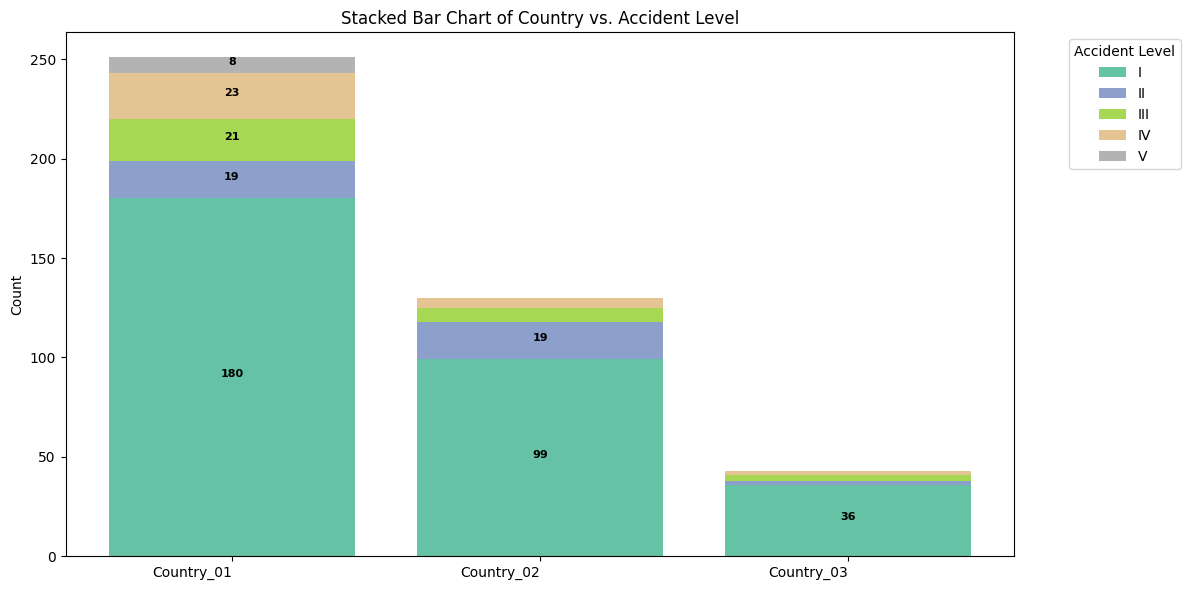

In [ ]:
stacked_bar_chart(df,'Country')

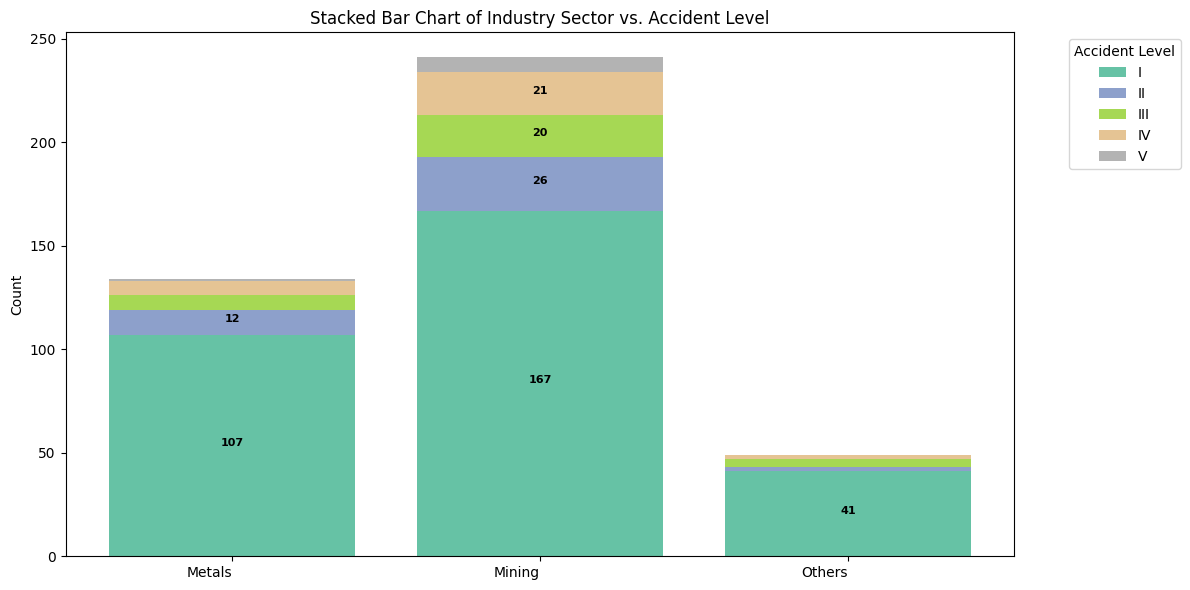

In [ ]:
stacked_bar_chart(df,'Industry Sector')

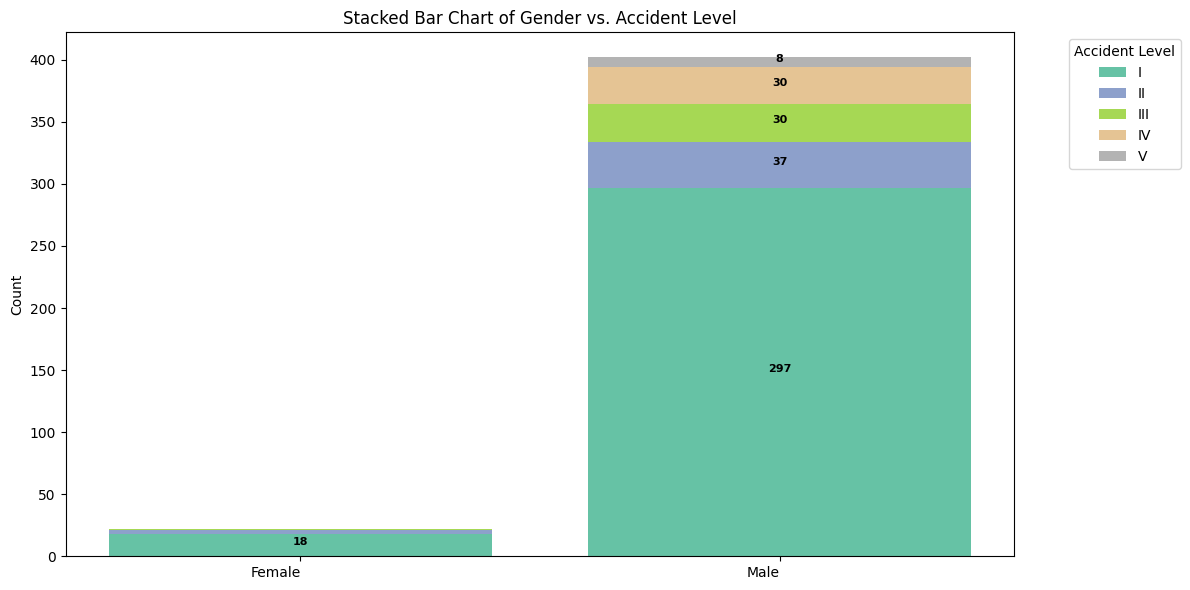

In [ ]:
stacked_bar_chart(df,'Gender')

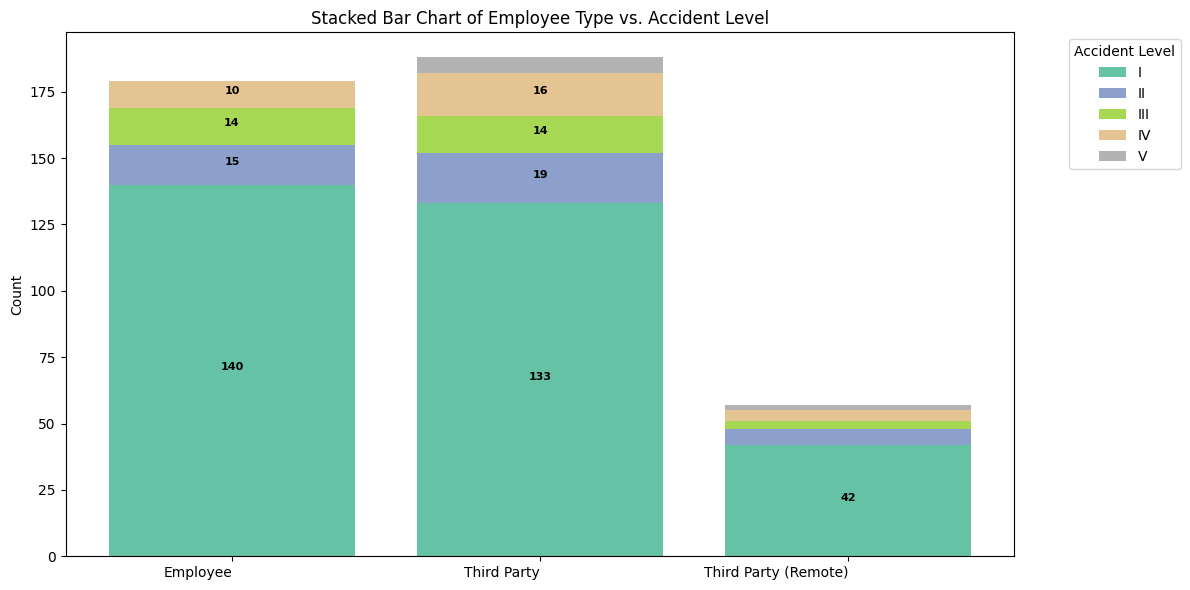

In [ ]:
stacked_bar_chart(df,'Employee Type')

##### Insights -


* Across most categories (Countries, Local, Industry Sector, Potential Accident Level, Genre, Employee or Third Party), Accident Level I is the most frequent, indicating a higher occurrence of less severe accidents. This suggests that most safety measures are effective in preventing major incidents.

* Country 2 exhibit a higher proportion of Level I, II and III accidents . This highlights potential areas for focused safety interventions and risk mitigation strategies.

* Country 1 exhibit a higher proportion of amongall level of accidents compared to other countries. This highlights potential areas for focused safety interventions and risk mitigation strategies.

* Mining Sector Has Most Accidents, Metals Sector Shows Higher Severity: The 'Mining' sector has the highest number of accidents across all levels, indicating a higher risk environment. The 'Metals' sector, while having fewer accidents overall, has a relatively higher proportion of Level IV accidents, suggesting a higher potential for severe incidents.

* Potential Accident Level Strongly Correlated with Actual Accident Level: There's a strong correlation between 'Potential Accident Level' and 'Accident Level', meaning that higher potential accident levels are associated with higher actual accident levels. This emphasizes the importance of proactive risk assessment and addressing potential hazards before they escalate.

* Males and Employees Involved in Most Accidents: The majority of accidents involve males and employees. While this could be influenced by workforce demographics, it is important to ensure safety measures are inclusive and address the specific needs of all employee groups.

* Third Parties Involved in More Severe Accidents: Level IV and V accidents have a greater proportion involving third parties compared to other levels. This suggests the need for safety protocols and training to address risks involving external personnel.


#### Time Series Analysis

In [ ]:
def line_chart(df,col):
    # Prepare data
    df_counts = df[col].value_counts().reset_index().sort_values(by=col)
    df_counts.columns = [col, 'count']

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot line chart
    ax.plot(df_counts[col], df_counts['count'], marker='o', linestyle='-', color=plt.cm.Paired(1))

    # Add text labels near points
    for i, txt in enumerate(df_counts['count']):
        ax.text(df_counts[col][i], df_counts['count'][i] - 1,  # Adjust position
                str(txt), ha='right', fontsize=8, color='black')

    # Labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title("Line Chart of Year-Month Counts")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=-45, ha='left')

    plt.tight_layout()
    plt.show()

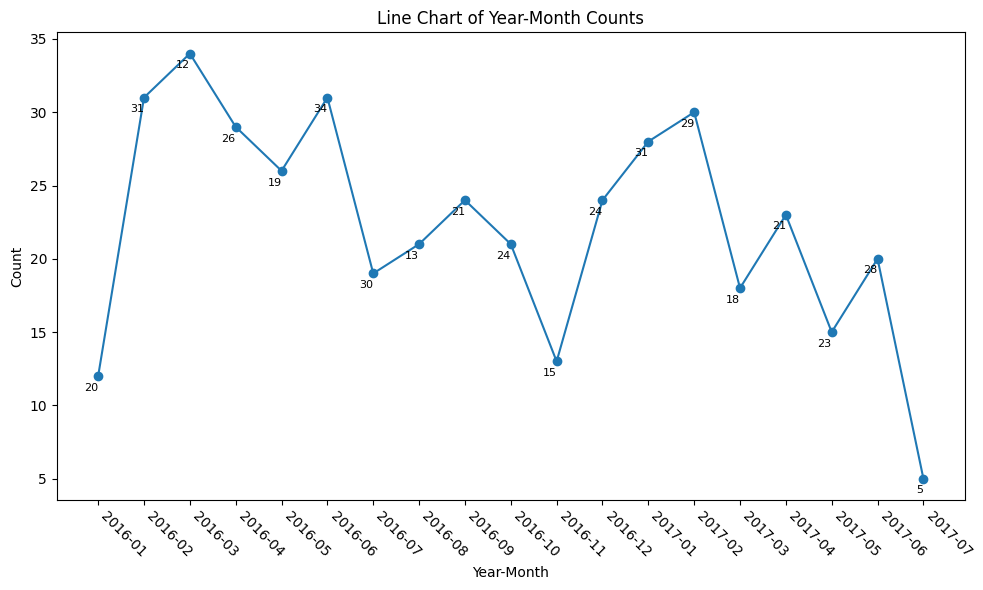

In [ ]:
line_chart(df,'Year-Month')

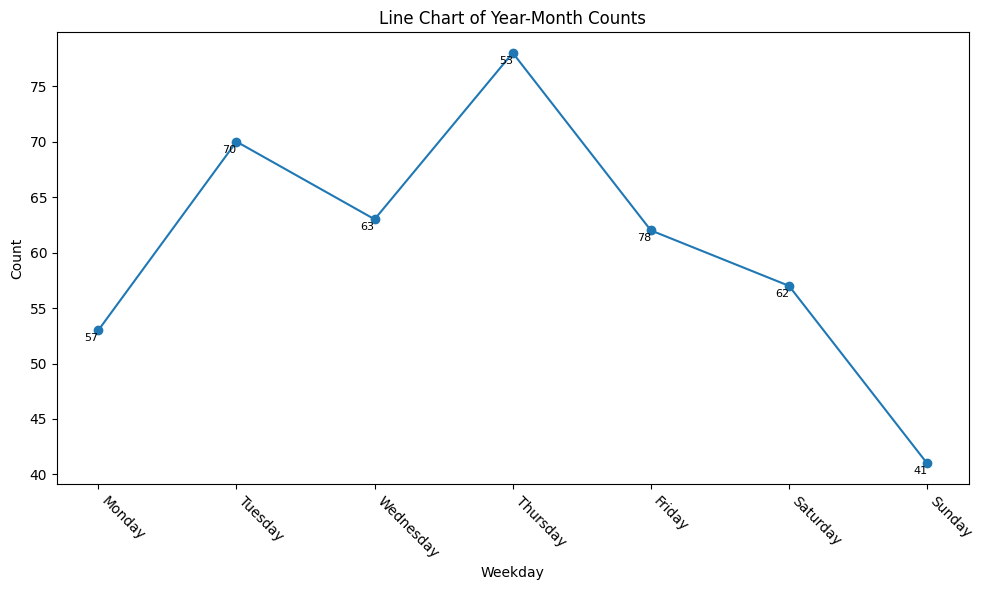

In [ ]:
# Define correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Weekday' column to categorical with defined order
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

line_chart(df,'Weekday')

##### Insights -

* The source data timeline ranges from Jan 2016 To Jul 2017.

* Majority of the accidents are of level 1.

* In the Year 2016 Number of Accidents increased till Jun 2016 and then suddenly dropped in Jul 2016.

* Maximum accidents of 30 occured in the month Jun 2016.
Year 2017 started with 21 accident which was maximum in that year.

* In Year 2017 starting from Jan 2017 accidents dropped and again increased in the subsequent month till Jul 2017.

* Most Accidents happened on Tuesday and Thursday.

* Surprisingly from Thursday till end of the week number of accidents went down.

#### Recommendation from EDA -

* Focus on Preventive Measures: Given the predominance of Accident Level I, prioritize preventive measures to maintain a low rate of less severe accidents.

* Targeted Interventions: Implement targeted safety interventions in Country 1 and 2 to address the higher proportion of Level III and IV accidents.

* Mining and Metals Sector Safety: Enhance safety protocols and training in the 'Mining' and 'Metals' sectors, focusing on risk assessment and hazard identification.

* Proactive Risk Management: Prioritize proactive risk management and address potential hazards before they escalate into actual accidents, as indicated by the correlation between 'Potential Accident Level' and 'Accident Level'.


* Inclusive Safety: Ensure safety measures are inclusive and address the specific needs of all employee groups, including males and females.

* Third-Party Safety: Develop safety protocols and training to address risks involving third parties, particularly in higher-risk situations.


**With above information, to build classification model , we will use**

**Target Variable** :- "Acciden Level"

**Feature** :- Data , Countries, Local,Industry sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description




### Step 4:- Data preprocessing (NLP Preprocessing techniques)

#### Create a copy of Dataframe

In [16]:
# Make copy of the cleanesed data
df_copy = df.copy();

#### One Hot Encoding

In [17]:
# Create one hot enconding on categorical variable
encoded_df = pd.get_dummies(df_copy, columns=['Country', 'Local', 'Industry Sector', 'Potential Accident Level', 'Gender', 'Employee Type','Critical Risk'])
encoded_df.head()

,Date,Accident Level,Description,Year,Month,Day,Weekday,Year-Month,Country_Country_01,Country_Country_02,...,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco
0,2016-01-01,I,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,1,Friday,2016-01,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2016-01-02,I,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,2,Saturday,2016-01,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2016-01-06,I,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,6,Wednesday,2016-01,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2016-01-08,I,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",2016,1,8,Friday,2016-01,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2016-01-10,IV,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",2016,1,10,Sunday,2016-01,True,False,...,False,False,False,False,False,False,False,False,False,False


#### NLP Preprocessing

In [18]:
#Function to perform normalization ,stop word removal , remove punctuation, remove special character , stemming and lemmatization
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Tokenize into words
    words = nltk.word_tokenize(text)

    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 6. Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # 7. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # 8. Join words back into a string
    processed_text = ' '.join(words)

    return processed_text

In [19]:
# Apply preprocessing to the 'Description' column
encoded_df['Processed Description'] = encoded_df['Description'].apply(preprocess_text)

In [20]:
encoded_df[['Description','Processed Description']]

,Description,Processed Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",substat milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",945 approxim nv 1880 cx695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr cristóbal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anticlockwis direct leav key bolt hit palm left hand caus injuri
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",approxim 1145 circumst mechan anthoni group leader eduardo eric fernándezinjuredth three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 106 meter high hit instep right foot worker caus injuri describ
...,...,...
420,"Being approximately 5:00 a.m. approximately, when lifting the Kelly HQ towards the pulley of the frame to align it, the assistant Marco that is in the later one is struck the hand against the frame generating the injury.",approxim 500 approxim lift kelli hq toward pulley frame align assist marco later one struck hand frame gener injuri
421,"The collaborator moved from the infrastructure office (Julio to the toilets, when the pin of the right shoe is hooked on the bra of the left shoe causing not to take the step and fall untimely, causing injury described.",collabor move infrastructur offic

#### WordCloud

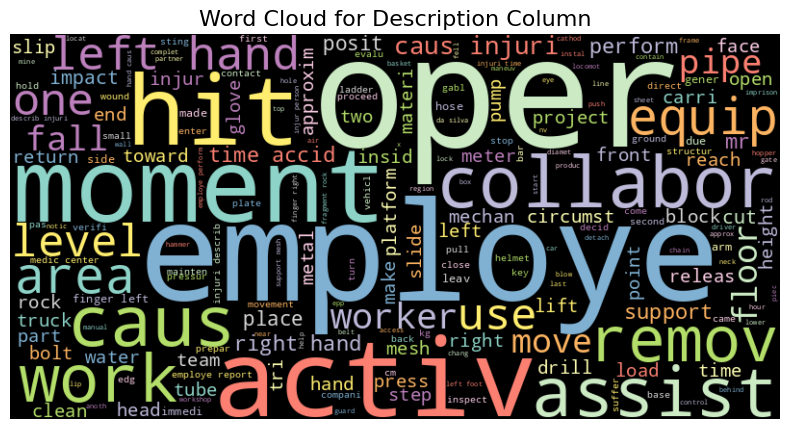

In [21]:
# Combine all descriptions into a single string
text = " ".join(encoded_df['Processed Description'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set3_r').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud for Description Column", fontsize=16)
plt.show()

##### Insights -

* Hand Injuries during Equipment Operation: A significant number of accidents involve hand injuries, potentially caused by machinery or equipment during operation or maintenance ("equip", "mechn", "oper", "hand", "cut", "press"). This emphasizes the need for hand protection and safe operating procedures for machinery.

* Slips, Trips, and Falls: Accidents related to falls ("fall", "floor") are prevalent. This could indicate issues with floor surfaces, housekeeping, or lack of proper fall protection measures.

* Unsafe Work Practices or Equipment Issues: The presence of words like "hit", "activ", "remove", "cut" suggests potential hazards related to work practices or equipment malfunction. Proper training, equipment maintenance, and risk assessment are crucial to mitigate these risks.

* Focus on Root Cause Analysis: The inclusion of "caus", "moment", and "caus injuri" indicates a focus on understanding the underlying causes of accidents. Companies should emphasize investigating accidents thoroughly to identify and address systemic issues.

* Collaboration and Assistance Risks: The word "assist" suggests that some accidents might occur during collaborative tasks or when providing assistance. Clear communication and coordination among employees are essential to prevent injuries in such situations.


#### N-Grams

In [22]:
# Function to generate n-gram frequency distribution per Accident Level
def ngram_freq_by_accident_level(df, column, group_col, n=2):
    grouped_ngrams = []

    # Group by 'Accident Level' and process each group
    for level, group in df.groupby(group_col):
        all_ngrams = []

        for text in group[column]:
            tokens = word_tokenize(text.lower())  # Tokenize and lowercase
            n_grams = list(ngrams(tokens, n))  # Generate n-grams
            all_ngrams.extend(n_grams)  # Collect all n-grams

        fdist = FreqDist(all_ngrams)  # Compute frequency distribution
        top_ngrams = fdist.most_common(5)  # Get top 10 n-grams

        # Store results in a structured format
        for ngram, count in top_ngrams:
            grouped_ngrams.append({'Accident Level': level, 'N-gram': ' '.join(ngram), 'Count': count})

    return pd.DataFrame(grouped_ngrams)

In [23]:
# unigrams
ngram_df = ngram_freq_by_accident_level(encoded_df, 'Processed Description', 'Accident Level', n=1)
ngram_df


,Accident Level,N-gram,Count
0,I,employe,138
1,I,caus,132
2,I,hand,116
3,I,right,113
4,I,left,107
5,II,caus,25
6,II,employe,23
7,II,hand,21
8,II,right,19
9,II,left,14


In [24]:
# bigrams
ngram_df = ngram_freq_by_accident_level(encoded_df, 'Processed Description', 'Accident Level', n=2)

ngram_df

,Accident Level,N-gram,Count
0,I,time accid,42
1,I,right hand,40
2,I,left hand,39
3,I,caus injuri,38
4,I,employe report,22
5,II,left hand,7
6,II,right hand,7
7,II,caus injuri,6
8,II,caus cut,4
9,II,finger right,4


##### Insights -
* When we look at the count of unigrams or bi-grams with respect to Accident Level we can see that Accident Levels 1-3 are related to employee and mostly involved the right/left hand.
* When it comes to sever accidents where accident level 4-5 mostly a operator is involved and particularly for accident level 5 mixer truck is involved.


### Step 5: Data preparation

#### Bag Of Words

In [25]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit and transform the text data
bow_matrix = vectorizer_bow.fit_transform(encoded_df['Processed Description'])

# Convert the result into a DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())

bow_df

,001,0010,007,01,01022017,01242017,0130,0150,018,0183,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Concatenate the bow_df DataFrame with the encoded DataFrame
encoded_df = encoded_df.reset_index(drop=True)
bow_df = bow_df.reset_index(drop=True)

#Concatenate the BoW DataFrame with the encoded DataFrame
final_bow_df = pd.concat([encoded_df, bow_df], axis=1)

# Drop 'Description', 'Processed Description',Year-Month and Date columns
final_bow_df = final_bow_df.drop(columns=['Description', 'Processed Description','Date','Year-Month','Weekday'])

# Now 'final_bow_df' contains the encoded features and BoW features  without 'Description', 'Processed Description',Year-Month and Date columns
final_bow_df.head()

,Accident Level,Year,Month,Day,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,2016,1,1,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,I,2016,1,2,False,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,I,2016,1,6,True,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,I,2016,1,8,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,IV,2016,1,10,True,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0


In [27]:
encoded_df.shape , final_bow_df.shape

((424, 71), (424, 2717))

#### TF-IDF

In [28]:
#Createing TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()

#Fit the vectorizer to the 'Processed Description' column
vectorizer_tfidf.fit(encoded_df['Processed Description'])

#Transform the 'Processed Description' column into TF-IDF features
tfidf_features = vectorizer_tfidf.transform(encoded_df['Processed Description'])

#Get feature names
feature_names = vectorizer_tfidf.get_feature_names_out()

#Create a DataFrame from TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

In [29]:
tfidf_df

,001,0010,007,01,01022017,01242017,0130,0150,018,0183,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Concatenate the TF-IDF DataFrame with the encoded DataFrame

tfidf_df = tfidf_df.reset_index(drop=True)

final_df_TFIDF = pd.concat([encoded_df, tfidf_df], axis=1)

# Drop 'Description', 'Processed Description',Year-Month and Date columns
final_df_TFIDF = final_df_TFIDF.drop(columns=['Description', 'Processed Description','Date','Year-Month','Weekday'])

# Now 'final_df_TFIDF' contains the encoded features and TF-IDF features  without 'Description', 'Processed Description',Year-Month and Date columns
final_df_TFIDF.head()

,Accident Level,Year,Month,Day,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,2016,1,1,True,False,False,True,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,I,2016,1,2,False,True,False,False,True,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,I,2016,1,6,True,False,False,False,False,True,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,I,2016,1,8,True,False,False,False,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,IV,2016,1,10,True,False,False,False,False,False,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
encoded_df.shape , final_df_TFIDF.shape

((424, 71), (424, 2717))

#### Store Clened Data into csv

In [32]:
# Apply Z-score on BoW dataframe
final_bow_df['Year'] = final_bow_df['Year'].transform(zscore)
final_bow_df['Month'] = final_bow_df['Year'].transform(zscore)
final_bow_df['Day'] = final_bow_df['Year'].transform(zscore)

final_bow_df.head(5)

,Accident Level,Year,Month,Day,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,-0.698369,-0.698369,-0.698369,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,I,-0.698369,-0.698369,-0.698369,False,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,IV,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0


In [33]:

# apply z-score on Year, Month and Day column
from scipy.stats import zscore

# Apply Z-score on TFIDF dataframe
final_df_TFIDF['Year'] = final_df_TFIDF['Year'].transform(zscore)
final_df_TFIDF['Month'] = final_df_TFIDF['Year'].transform(zscore)
final_df_TFIDF['Day'] = final_df_TFIDF['Year'].transform(zscore)

final_df_TFIDF.head(5)


,Accident Level,Year,Month,Day,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,-0.698369,-0.698369,-0.698369,True,False,False,True,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,I,-0.698369,-0.698369,-0.698369,False,True,False,False,True,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,True,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,IV,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_df_TFIDF.to_csv('final_df_TFIDF.csv', index=False)
final_bow_df.to_csv('final_bow_df.csv', index=False)

### Step 6: Design train and test basic machine learning**

#### Bag Of Words

##### Base Model

###### Training

In [35]:
#Separate features (X) and target (y)
X_bow = final_bow_df.drop('Accident Level', axis=1)  # Features
y_bow = final_bow_df['Accident Level']  # Target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable
le.fit(y_bow)

# Transform your target variable
y_bow = le.transform(y_bow)

#Split data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)  # 80% train, 20% test

#Define a list of classifiers
classifiers_bow = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier
results_bow = []
for classifier in classifiers_bow:
    # Train the classifier
    classifier.fit(X_train_bow, y_train_bow)

    # Make predictions on the train set
    y_pred_train = classifier.predict(X_train_bow)

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test_bow)

    # Evaluate the classifier on train set
    accuracy_train = accuracy_score(y_train_bow, y_pred_train)
    precision_train = precision_score(y_train_bow, y_pred_train, average='macro')  # Use weighted for multi-class
    recall_train = recall_score(y_train_bow, y_pred_train, average='macro')
    f1_train = f1_score(y_train_bow, y_pred_train, average='macro')

    # Evaluate the classifier on test set
    accuracy_test = accuracy_score(y_test_bow, y_pred_test)
    precision_test = precision_score(y_test_bow, y_pred_test, average='macro')  # Use weighted for multi-class
    recall_test = recall_score(y_test_bow, y_pred_test, average='macro')
    f1_test = f1_score(y_test_bow, y_pred_test, average='macro')

    # Store the results
    results_bow.append([classifier.__class__.__name__, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

#Create a DataFrame to display the results
results_df_bow = pd.DataFrame(results_bow, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                            'Train F1-Score', 'Test F1-Score'])

###### Performance Check

In [36]:
#Print result
results_df_bow

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,LogisticRegression,0.997050,0.764706,0.994595,0.168831,0.992000,0.188406,0.993179,0.178082
1,DecisionTreeClassifier,0.997050,0.729412,0.994595,0.550879,0.992000,0.458986,0.993179,0.459083
2,RandomForestClassifier,0.997050,0.811765,0.994595,0.164286,0.992000,0.200000,0.993179,0.180392
3,GradientBoostingClassifier,0.997050,0.788235,0.992308,0.235897,0.994444,0.241304,0.993262,0.236735
4,XGBClassifier,0.997050,0.835294,0.992308,0.605128,0.994444,0.390870,0.993262,0.448980
5,GaussianNB,0.994100,0.811765,0.986595,0.164286,0.991187,0.200000,0.988853,0.180392
6,KNeighborsClassifier,0.734513,0.800000,0.461558,0.161905,0.234598,0.197101,0.233546,0.177778
7,AdaBoostClassifier,0.737463,0.788235,0.395947,0.165432,0.244004,0.194203,0.245369,0.178667
8,BaggingClassifier,0.967552,0.788235,0.983854,0.518421,0.928444,0.342174,0.953825,0.387663
9,SVC,0.817109,0.811765,0.959740,0.162353,0.463185,0.200000,0.546113,0.179221


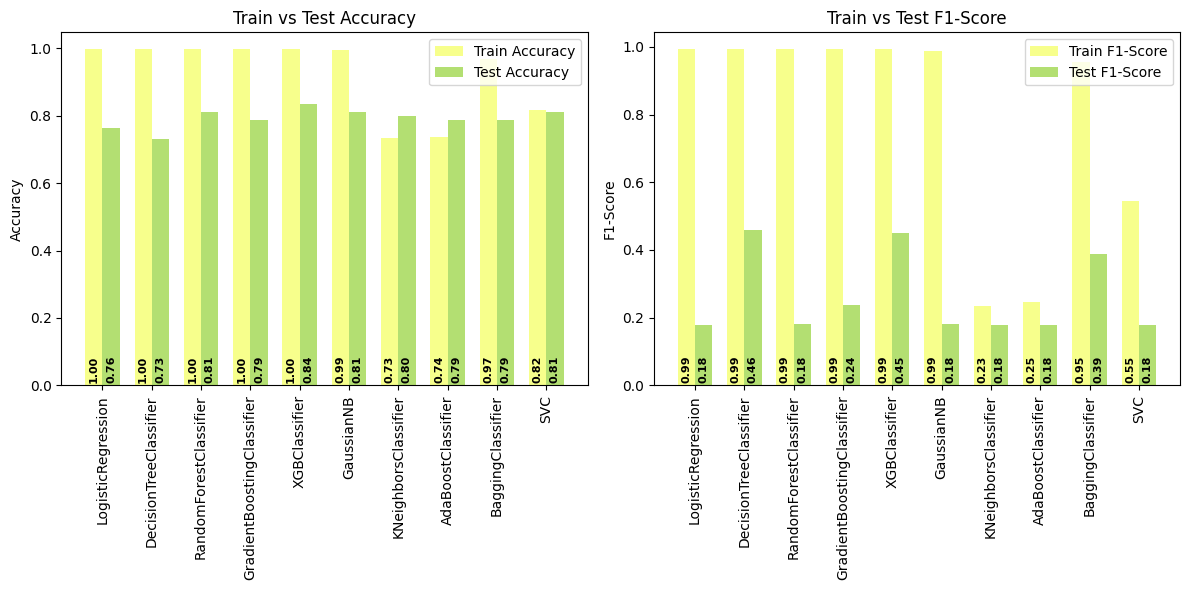

In [37]:
# Setting positions for bars
x = np.arange(len(results_df_bow['Classifier']))  # Label locations
width = 0.35  # Width of the bars

# Custom colors
train_color = '#F7FF8C'  # Coral Yellow
test_color = '#B3DF72'   # Green


# Creating two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Chart
axes[0].bar(x - width/2, results_df_bow['Train Accuracy'], width, label='Train Accuracy', color=train_color)
axes[0].bar(x + width/2, results_df_bow['Test Accuracy'], width, label='Test Accuracy', color=test_color)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_df_bow['Classifier'], rotation=90)
axes[0].legend()

# F1-Score Chart
axes[1].bar(x - width/2, results_df_bow['Train F1-Score'], width, label='Train F1-Score', color=train_color)
axes[1].bar(x + width/2, results_df_bow['Test F1-Score'], width, label='Test F1-Score', color=test_color)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Train vs Test F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df_bow['Classifier'], rotation=90)
axes[1].legend()

# Function to add labels inside bars
def add_labels(ax, values):
    for rect, value in zip(ax.patches, values):
        ax.annotate(f'{value:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, 0.02),  # Placing near the bottom
                    xytext=(0, -3),  # Offset downwards
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=8, fontweight="bold", color="black")

# Adding labels inside bars for both charts
add_labels(axes[0], list(results_df_bow['Train Accuracy']) + list(results_df_bow['Test Accuracy']))
add_labels(axes[1], list(results_df_bow['Train F1-Score']) + list(results_df_bow['Test F1-Score']))

#plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### SMOTE

###### Oversampling

In [38]:
# Apply SMOTE to the bag of word training data
smote_bow = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y_train_bow)) - 1))
X_train_resampled_bow, y_train_resampled_bow = smote_bow.fit_resample(X_train_bow, y_train_bow)

###### Training

In [39]:
#Define a list of classifiers
classifiers_bow_smote = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier with oversampling
results_smote_bow = []
for classifier in classifiers_bow_smote:
    # Train the classifier
    classifier.fit(X_train_resampled_bow, y_train_resampled_bow)

    # Make predictions on the train set
    y_pred_train = classifier.predict(X_train_resampled_bow)

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test_bow)

    # Evaluate the classifier on train set
    accuracy_train = accuracy_score(y_train_resampled_bow, y_pred_train)
    precision_train = precision_score(y_train_resampled_bow, y_pred_train, average='weighted')  # Use weighted for multi-class
    recall_train = recall_score(y_train_resampled_bow, y_pred_train, average='weighted')
    f1_train = f1_score(y_train_resampled_bow, y_pred_train, average='weighted')

    # Evaluate the classifier on test set
    accuracy = accuracy_score(y_test_bow, y_pred_test)
    precision = precision_score(y_test_bow, y_pred_test, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_test_bow, y_pred_test, average='weighted')
    f1 = f1_score(y_test_bow, y_pred_test, average='weighted')

    # Store the results
    results_smote_bow.append([classifier.__class__.__name__, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

#Create a DataFrame to display the results
results_smote_bow_df = pd.DataFrame(results_smote_bow, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                            'Train F1-Score', 'Test F1-Score'])

###### Performance Check

In [40]:
#Print bow smote model result
results_smote_bow_df

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,LogisticRegression,0.997561,0.811765,0.997564,0.162353,0.997561,0.2,0.997561,0.179221
1,DecisionTreeClassifier,0.999187,0.811765,0.999190,0.162353,0.999187,0.2,0.999187,0.179221
2,RandomForestClassifier,0.999187,0.811765,0.999190,0.162353,0.999187,0.2,0.999187,0.179221
3,GradientBoostingClassifier,0.996748,0.811765,0.996800,0.162353,0.996748,0.2,0.996748,0.179221
4,XGBClassifier,0.999187,0.811765,0.999190,0.162353,0.999187,0.2,0.999187,0.179221
5,GaussianNB,0.952033,0.811765,0.959354,0.162353,0.952033,0.2,0.952559,0.179221
6,KNeighborsClassifier,0.812195,0.811765,0.859568,0.162353,0.812195,0.2,0.754146,0.179221
7,AdaBoostClassifier,0.677236,0.811765,0.706817,0.162353,0.677236,0.2,0.665212,0.179221
8,BaggingClassifier,0.995935,0.811765,0.995955,0.162353,0.995935,0.2,0.995938,0.179221
9,SVC,0.990244,0.811765,0.990478,0.162353,0.990244,0.2,0.990254,0.179221


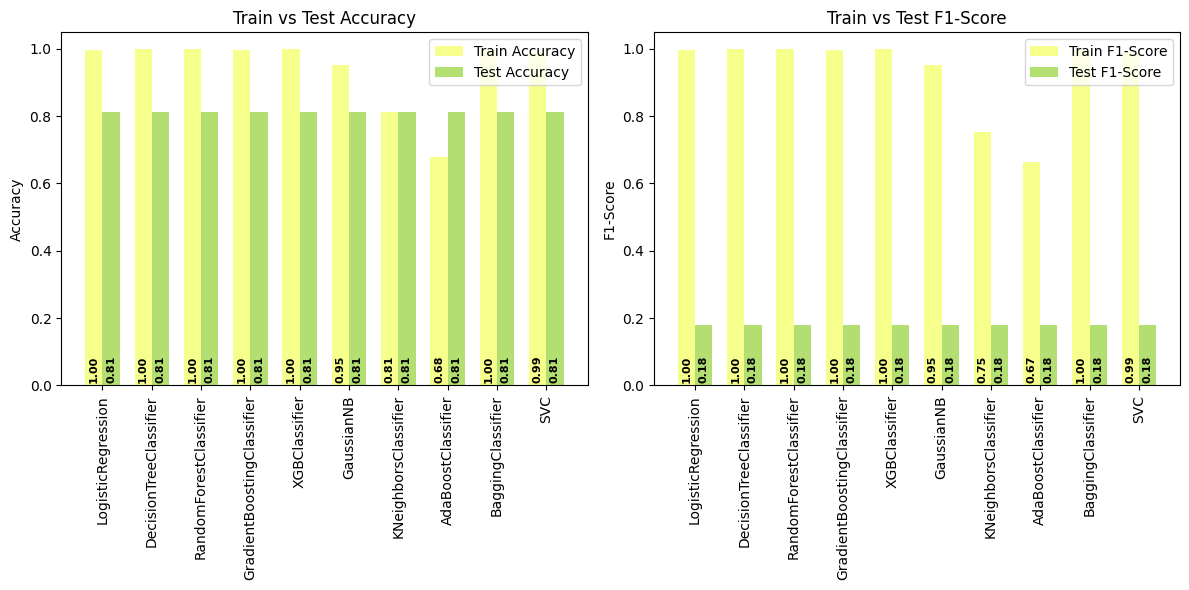

In [41]:
# Setting positions for bars
x = np.arange(len(results_smote_bow_df['Classifier']))  # Label locations
width = 0.35  # Width of the bars

# Custom colors
train_color = '#F7FF8C'  # Coral Yellow
test_color = '#B3DF72'   # Green


# Creating two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Chart
axes[0].bar(x - width/2, results_smote_bow_df['Train Accuracy'], width, label='Train Accuracy', color=train_color)
axes[0].bar(x + width/2, results_smote_bow_df['Test Accuracy'], width, label='Test Accuracy', color=test_color)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_smote_bow_df['Classifier'], rotation=90)
axes[0].legend()

# F1-Score Chart
axes[1].bar(x - width/2, results_smote_bow_df['Train F1-Score'], width, label='Train F1-Score', color=train_color)
axes[1].bar(x + width/2, results_smote_bow_df['Test F1-Score'], width, label='Test F1-Score', color=test_color)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Train vs Test F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_smote_bow_df['Classifier'], rotation=90)
axes[1].legend()

# Function to add labels inside bars
def add_labels(ax, values):
    for rect, value in zip(ax.patches, values):
        ax.annotate(f'{value:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, 0.02),  # Placing near the bottom
                    xytext=(0, -3),  # Offset downwards
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=8, fontweight="bold", color="black")

# Adding labels inside bars for both charts
add_labels(axes[0], list(results_smote_bow_df['Train Accuracy']) + list(results_smote_bow_df['Test Accuracy']))
add_labels(axes[1], list(results_smote_bow_df['Train F1-Score']) + list(results_smote_bow_df['Test F1-Score']))

#plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### Insights -

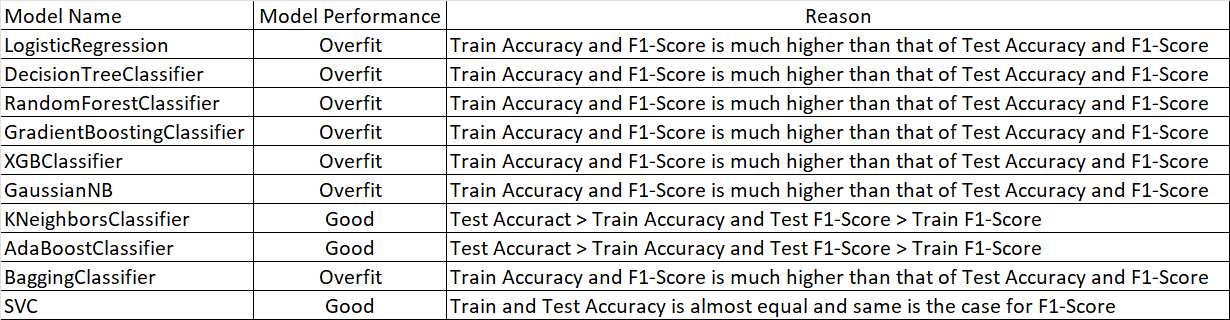

* When oversampling is applied using SMOTE we did not see the substantial improvement in any of the base model performance.
* So with Bag Of Words **Adaboost Classifier** performed well both in Train and Test with **highest F1-Score of 72.51%**

##### Best Model

In [51]:
# Create confusion matrix
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues,best_classifier=None):

  if y_test.ndim == 2 and y_test.shape[1] > 1:  # Check if y_test is one-hot encoded
    y_test = np.argmax(y_test, axis=1)

  cm = confusion_matrix(y_test, y_pred)

   # Map best_classifier.classes_ to custom labels
  if best_classifier is not None:
      class_mapping = {class_val: label for class_val, label in zip(best_classifier.classes_, ['I', 'II', 'III', 'IV', 'V'])}
      custom_labels = [class_mapping.get(class_val, str(class_val)) for class_val in best_classifier.classes_]
  else:
      custom_labels = ['I', 'II', 'III', 'IV', 'V']  # Default labels if best_classifier not provided


  # Plot confusion matrix with colormap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
            xticklabels=custom_labels,
            yticklabels=custom_labels)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        69
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.79        85
   macro avg       0.17      0.19      0.18        85
weighted avg       0.67      0.79      0.73        85



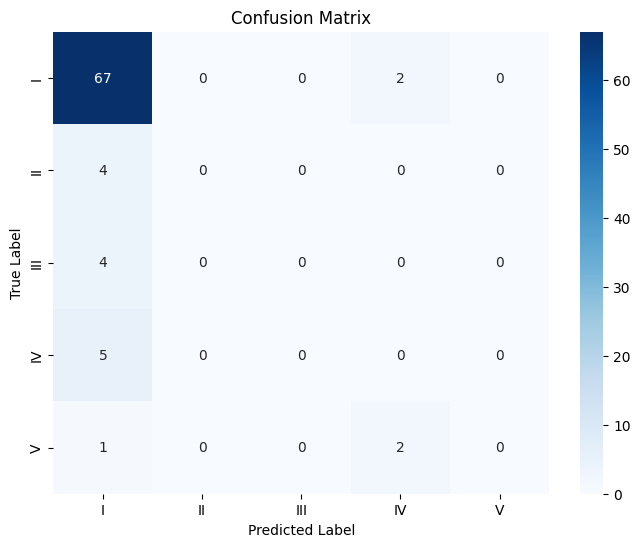

In [43]:
# With bag of word dataframe , we are getting BaggingClassifier as best result
# Classification Report and Confusion Matrix using this model
best_classifier_bow = AdaBoostClassifier()
best_classifier_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = best_classifier_bow.predict(X_test_bow)
print("\nClassification Report:\n", classification_report(y_test_bow, y_pred_bow))
plot_confusion_matrix(y_test_bow, y_pred_bow,'Confusion Matrix',plt.cm.Blues,best_classifier_bow)

* Though Adaboost Classifier performed well in both Train and Test with respect to F1-Score from the Confusion Matrix above it is evident that it misclassifies the minority class into majority class.
* Let's now try a different approach to generate features out of Description column using TF-IDF

#### TF-IDF

##### Base Model

###### Training

In [44]:
#Separate features (X) and target (y)
X = final_df_TFIDF.drop('Accident Level', axis=1)  # Features
y = final_df_TFIDF['Accident Level']  # Target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable
le.fit(y)

# Transform your target variable
y = le.transform(y)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

#Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier
results = []
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the train set
    y_pred_train = classifier.predict(X_train)

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)

    # Evaluate the classifier on test data set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')  # Use weighted for multi-class
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    # Evaluate the classifier on test data set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')  # Use weighted for multi-class
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Store the results
    results.append([classifier.__class__.__name__, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

#Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                            'Train F1-Score', 'Test F1-Score'])

###### Performance Check

In [45]:
#Print the results
results_df

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,LogisticRegression,0.864307,0.847059,0.879701,0.771755,0.864307,0.847059,0.846737,0.802014
1,DecisionTreeClassifier,0.997050,0.752941,0.997130,0.769748,0.997050,0.752941,0.997040,0.754902
2,RandomForestClassifier,0.997050,0.811765,0.997164,0.658962,0.997050,0.811765,0.997058,0.727426
3,GradientBoostingClassifier,0.997050,0.764706,0.997130,0.689593,0.997050,0.764706,0.997040,0.722529
4,XGBClassifier,0.997050,0.823529,0.997130,0.763834,0.997050,0.823529,0.997040,0.772471
5,GaussianNB,0.994100,0.811765,0.994180,0.674841,0.994100,0.811765,0.994117,0.736997
6,KNeighborsClassifier,0.749263,0.800000,0.714909,0.665060,0.749263,0.800000,0.694253,0.726316
7,AdaBoostClassifier,0.752212,0.823529,0.658700,0.721899,0.752212,0.823529,0.685427,0.755820
8,BaggingClassifier,0.970501,0.811765,0.971438,0.739674,0.970501,0.811765,0.969658,0.772607
9,SVC,0.725664,0.811765,0.526588,0.658962,0.725664,0.811765,0.610302,0.727426


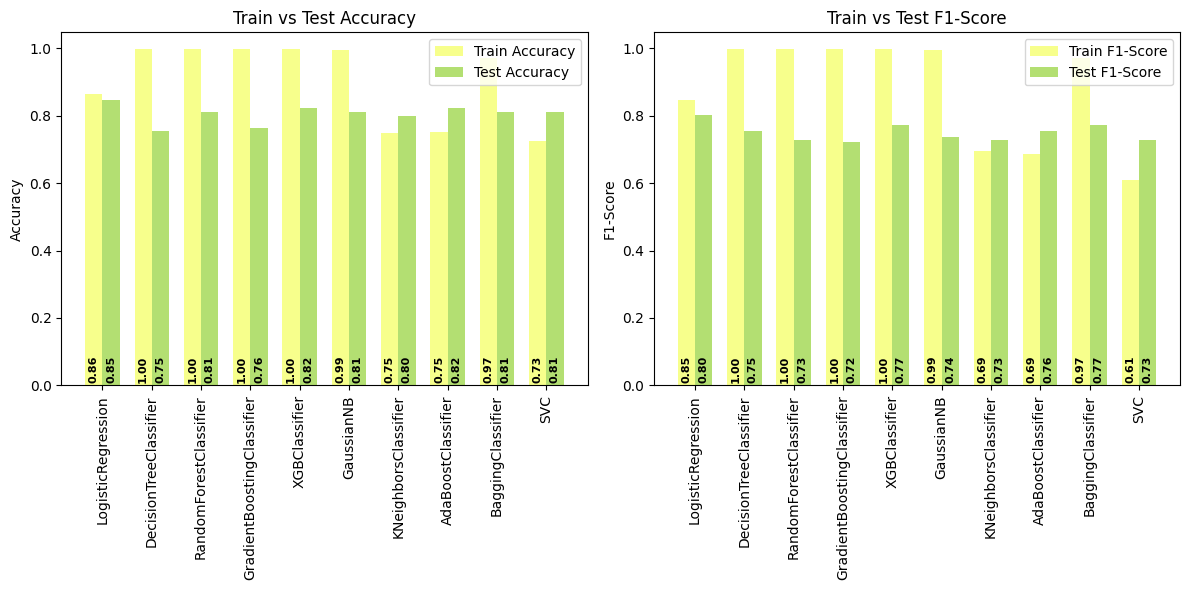

In [46]:
# Setting positions for bars
x = np.arange(len(results_df['Classifier']))  # Label locations
width = 0.35  # Width of the bars

# Custom colors
train_color = '#F7FF8C'  # Coral Yellow
test_color = '#B3DF72'   # Green


# Creating two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Chart
axes[0].bar(x - width/2, results_df['Train Accuracy'], width, label='Train Accuracy', color=train_color)
axes[0].bar(x + width/2, results_df['Test Accuracy'], width, label='Test Accuracy', color=test_color)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_df['Classifier'], rotation=90)
axes[0].legend()

# F1-Score Chart
axes[1].bar(x - width/2, results_df['Train F1-Score'], width, label='Train F1-Score', color=train_color)
axes[1].bar(x + width/2, results_df['Test F1-Score'], width, label='Test F1-Score', color=test_color)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Train vs Test F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df['Classifier'], rotation=90)
axes[1].legend()

# Function to add labels inside bars
def add_labels(ax, values):
    for rect, value in zip(ax.patches, values):
        ax.annotate(f'{value:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, 0.02),  # Placing near the bottom
                    xytext=(0, -3),  # Offset downwards
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=8, fontweight="bold", color="black")

# Adding labels inside bars for both charts
add_labels(axes[0], list(results_df['Train Accuracy']) + list(results_df['Test Accuracy']))
add_labels(axes[1], list(results_df['Train F1-Score']) + list(results_df['Test F1-Score']))

#plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### SMOTE

###### Oversampling

In [47]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y_train)) - 1))
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

###### Training

In [48]:
#Define a list of classifiers
classifiers_smote = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier with oversampling
results_smote = []
for classifier in classifiers_smote:
    # Train the classifier
    classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the train set
    y_pred_train = classifier.predict(X_train_resampled)

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)

    # Evaluate the classifier on train set
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    precision = precision_score(y_train_resampled, y_pred_train, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_train_resampled, y_pred_train, average='weighted')
    f1 = f1_score(y_train_resampled, y_pred_train, average='weighted')

    # Evaluate the classifier on test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')  # Use weighted for multi-class
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Store the results
    results_smote.append([classifier.__class__.__name__, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

#Create a DataFrame to display the results
results_smote_df = pd.DataFrame(results_smote, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                            'Train F1-Score', 'Test F1-Score'])

###### Performance Check

In [49]:
#result with oversampling
results_smote_df

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,LogisticRegression,0.985366,0.823529,0.526588,0.775542,0.725664,0.823529,0.610302,0.793440
1,DecisionTreeClassifier,0.999187,0.729412,0.526588,0.735294,0.725664,0.729412,0.610302,0.731765
2,RandomForestClassifier,0.999187,0.811765,0.526588,0.658962,0.725664,0.811765,0.610302,0.727426
3,GradientBoostingClassifier,0.999187,0.776471,0.526588,0.713983,0.725664,0.776471,0.610302,0.743110
4,XGBClassifier,0.999187,0.752941,0.526588,0.706353,0.725664,0.752941,0.610302,0.726471
5,GaussianNB,0.998374,0.811765,0.526588,0.674841,0.725664,0.811765,0.610302,0.736997
6,KNeighborsClassifier,0.947967,0.541176,0.526588,0.711061,0.725664,0.541176,0.610302,0.612895
7,AdaBoostClassifier,0.796748,0.635294,0.526588,0.696313,0.725664,0.635294,0.610302,0.663434
8,BaggingClassifier,0.991870,0.741176,0.526588,0.723249,0.725664,0.741176,0.610302,0.729936
9,SVC,0.969919,0.717647,0.526588,0.694118,0.725664,0.717647,0.610302,0.704981


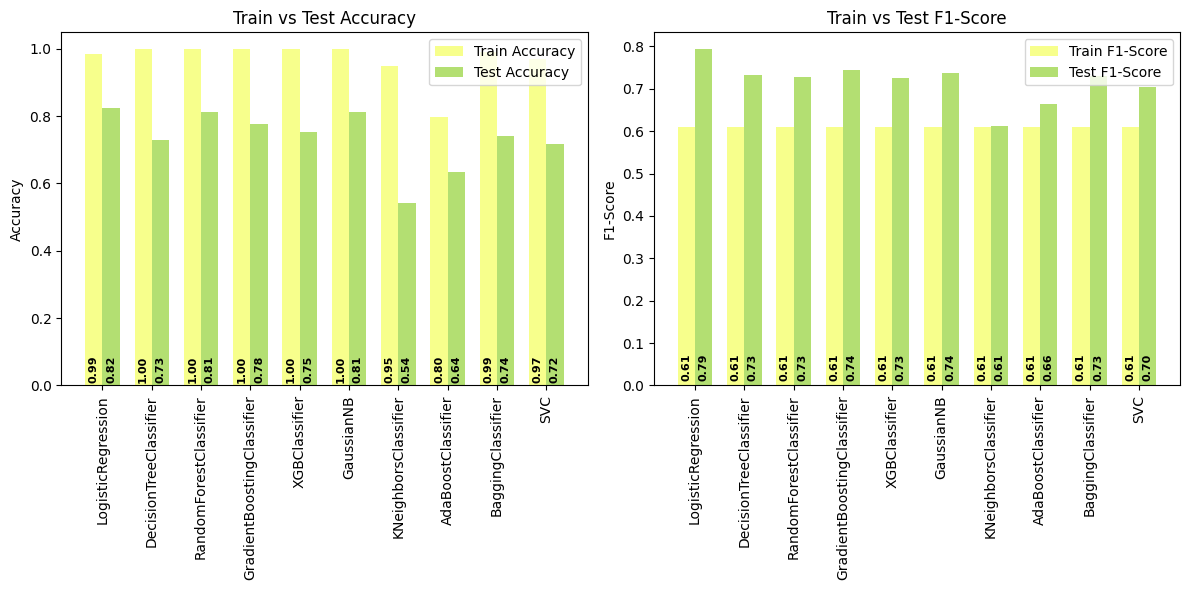

In [50]:
# Setting positions for bars
x = np.arange(len(results_smote_df['Classifier']))  # Label locations
width = 0.35  # Width of the bars

# Custom colors
train_color = '#F7FF8C'  # Coral Yellow
test_color = '#B3DF72'   # Green


# Creating two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Chart
axes[0].bar(x - width/2, results_smote_df['Train Accuracy'], width, label='Train Accuracy', color=train_color)
axes[0].bar(x + width/2, results_smote_df['Test Accuracy'], width, label='Test Accuracy', color=test_color)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_smote_df['Classifier'], rotation=90)
axes[0].legend()

# F1-Score Chart
axes[1].bar(x - width/2, results_smote_df['Train F1-Score'], width, label='Train F1-Score', color=train_color)
axes[1].bar(x + width/2, results_smote_df['Test F1-Score'], width, label='Test F1-Score', color=test_color)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Train vs Test F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_smote_df['Classifier'], rotation=90)
axes[1].legend()

# Function to add labels inside bars
def add_labels(ax, values):
    for rect, value in zip(ax.patches, values):
        ax.annotate(f'{value:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, 0.02),  # Placing near the bottom
                    xytext=(0, -3),  # Offset downwards
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=8, fontweight="bold", color="black")

# Adding labels inside bars for both charts
add_labels(axes[0], list(results_smote_df['Train Accuracy']) + list(results_smote_df['Test Accuracy']))
add_labels(axes[1], list(results_smote_df['Train F1-Score']) + list(results_smote_df['Test F1-Score']))

#plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### Insights -

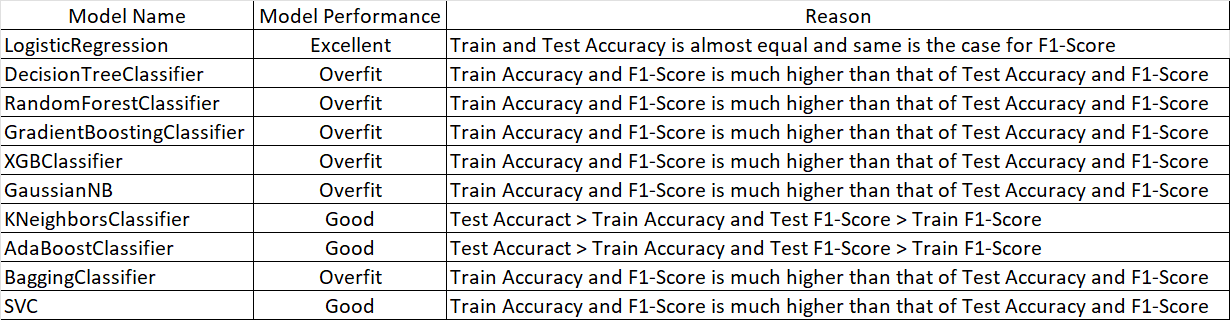

* When oversampling is applied using SMOTE we did not see the substantial improvement in any of the base model performance.
* So with TF-IDF **Logistic Regressor** performed well both in Train and Test with **highest F1-Score approx 80%**

##### Best Model

In [51]:
#Print Classification Report and Confusion Matrix for the best model
best_classifier = LogisticRegression(max_iter=1000)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         3

    accuracy                           0.85        85
   macro avg       0.41      0.33      0.35        85
weighted avg       0.77      0.85      0.80        85



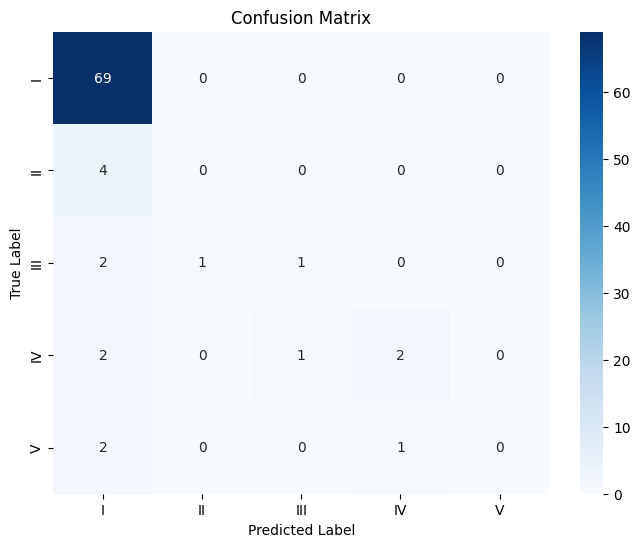

In [52]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_classifier)

* Though Logistic Regressor performed well in both Train and Test with respect to F1-Score from the Confusion Matrix above it is evident that it misclassifies the minority class into majority class.
* Let's now try to improve model performance using PCA

#### PCA

##### Principal Components

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

##### Training

In [ ]:
# Define a list of classifiers
classifiers_pca = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]


# Train and evaluate each classifier with PCA
results_pca = []
for classifier in classifiers_pca:
    # Train the classifier
    classifier.fit(X_train_pca, y_train_resampled)

    # Make predictions on the train set
    y_pred_train = classifier.predict(X_train_pca)

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test_pca)

    # Evaluate the classifier on train set
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    precision_train = precision_score(y_train_resampled, y_pred_train, average='weighted')
    recall_train = recall_score(y_train_resampled, y_pred_train, average='weighted')
    f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')

    # Evaluate the classifier on test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Store the results
    results_pca.append([classifier.__class__.__name__, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

# Create a DataFrame to display the results
results_pca_df = pd.DataFrame(results_pca, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                            'Train F1-Score', 'Test F1-Score'])

##### Performance Check

In [ ]:
#Result with PCA
results_pca_df

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,LogisticRegression,0.954472,0.811765,0.954600,0.758543,0.954472,0.811765,0.954459,0.778294
1,DecisionTreeClassifier,0.999187,0.576471,0.999190,0.691317,0.999187,0.576471,0.999187,0.624625
2,RandomForestClassifier,0.999187,0.764706,0.999190,0.651416,0.999187,0.764706,0.999187,0.703529
3,GradientBoostingClassifier,0.999187,0.764706,0.999190,0.701238,0.999187,0.764706,0.999187,0.730710
4,XGBClassifier,0.999187,0.741176,0.999190,0.655656,0.999187,0.741176,0.999187,0.695798
5,GaussianNB,0.867480,0.588235,0.867626,0.730561,0.867480,0.588235,0.865503,0.650606
6,KNeighborsClassifier,0.965041,0.658824,0.965106,0.684021,0.965041,0.658824,0.964989,0.670692
7,AdaBoostClassifier,0.773171,0.529412,0.774368,0.706377,0.773171,0.529412,0.771853,0.589250
8,BaggingClassifier,0.996748,0.670588,0.996774,0.696137,0.996748,0.670588,0.996751,0.682630
9,SVC,0.957724,0.694118,0.957515,0.690252,0.957724,0.694118,0.957345,0.691562


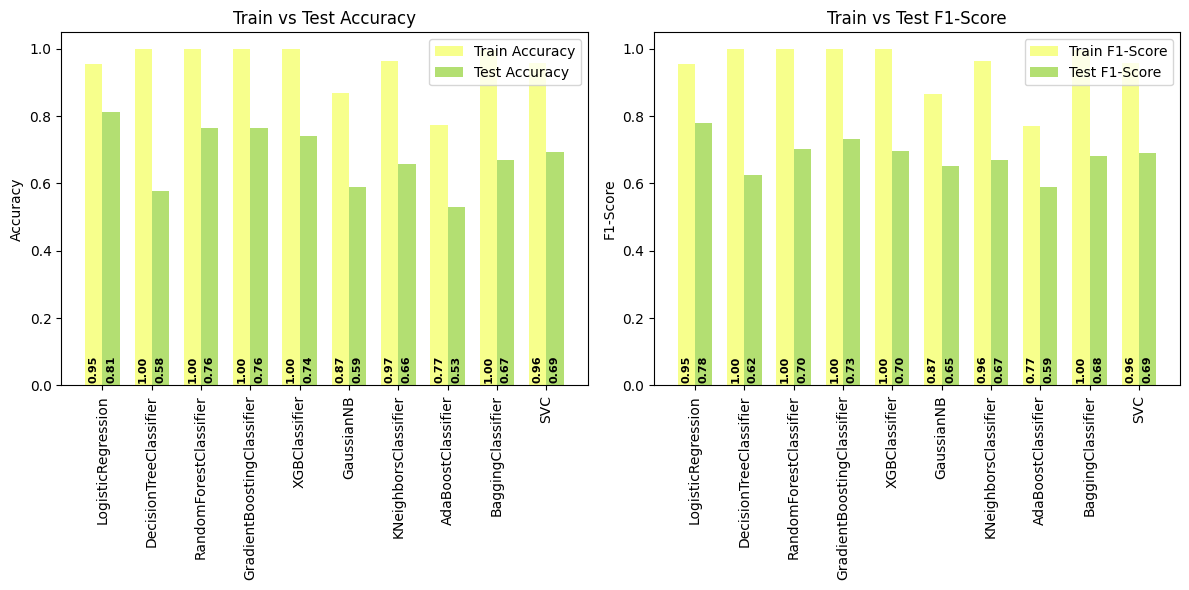

In [ ]:
# Setting positions for bars
x = np.arange(len(results_pca_df['Classifier']))  # Label locations
width = 0.35  # Width of the bars

# Custom colors
train_color = '#F7FF8C'  # Coral Yellow
test_color = '#B3DF72'   # Green


# Creating two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Chart
axes[0].bar(x - width/2, results_pca_df['Train Accuracy'], width, label='Train Accuracy', color=train_color)
axes[0].bar(x + width/2, results_pca_df['Test Accuracy'], width, label='Test Accuracy', color=test_color)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_pca_df['Classifier'], rotation=90)
axes[0].legend()

# F1-Score Chart
axes[1].bar(x - width/2, results_pca_df['Train F1-Score'], width, label='Train F1-Score', color=train_color)
axes[1].bar(x + width/2, results_pca_df['Test F1-Score'], width, label='Test F1-Score', color=test_color)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Train vs Test F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_pca_df['Classifier'], rotation=90)
axes[1].legend()

# Function to add labels inside bars
def add_labels(ax, values):
    for rect, value in zip(ax.patches, values):
        ax.annotate(f'{value:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, 0.02),  # Placing near the bottom
                    xytext=(0, -3),  # Offset downwards
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90, fontsize=8, fontweight="bold", color="black")

# Adding labels inside bars for both charts
add_labels(axes[0], list(results_pca_df['Train Accuracy']) + list(results_pca_df['Test Accuracy']))
add_labels(axes[1], list(results_pca_df['Train F1-Score']) + list(results_pca_df['Test F1-Score']))

#plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### Insights -
* PCA doesn't seems improving balance.



#### Hyperparameter Tunning

In [ ]:
# Pipeline with SMOTE and LogisticRegression
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Initialize with random_state
])

In [ ]:
# Define Hyperparameter Grid for LogisticRegression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Solver algorithms for different penalties
    # Add 'class_weight' for handling class imbalance
    'classifier__class_weight': [None, 'balanced']
}

In [ ]:
#Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=2)  # Use appropriate scoring
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s
[CV] END c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1_weighted', verbose=2)

In [ ]:
#Get the Best Model and Results
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'classifier__C': 100, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [ ]:
#Evaluate the Best Model
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        69
           1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         4
           3       0.20      0.20      0.20         5
           4       0.50      0.33      0.40         3

    accuracy                           0.78        85
   macro avg       0.41      0.39      0.40        85
weighted avg       0.76      0.78      0.77        85



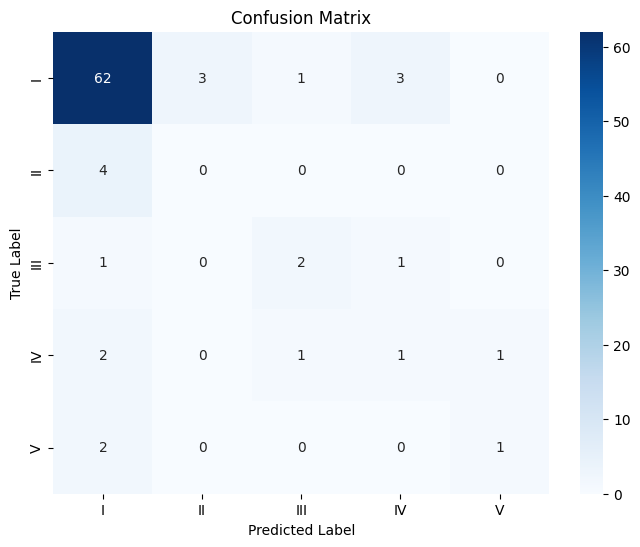

In [ ]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_model)

**Insight**

* With hyperparameter tuning also, we are not seeing perfromance improved compred to base model.

* LogisticRegression without oversampling so far is having best F1-Score


### Best Model

In [ ]:
# So far we have below Best model performance result on test data.  Classification Report and Confusion Matrix for the best model
best_classifier = LogisticRegression(max_iter=1000)
best_classifier.fit(X_train, y_train)
y_train_pred = best_classifier.predict(X_train)
y_pred = best_classifier.predict(X_test)

In [ ]:
print("\nClassification Report Train Data:\n", classification_report(y_train, y_train_pred))


Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       0.95      0.50      0.65        36
           2       1.00      0.41      0.58        27
           3       0.94      0.60      0.73        25
           4       1.00      0.60      0.75         5

    accuracy                           0.86       339
   macro avg       0.95      0.62      0.73       339
weighted avg       0.88      0.86      0.85       339



In [ ]:
print("\nClassification Report Test Data:\n", classification_report(y_test, y_pred))


Classification Report Test Data:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         3

    accuracy                           0.85        85
   macro avg       0.41      0.33      0.35        85
weighted avg       0.77      0.85      0.80        85



Confusion Matrix with Train Data:-


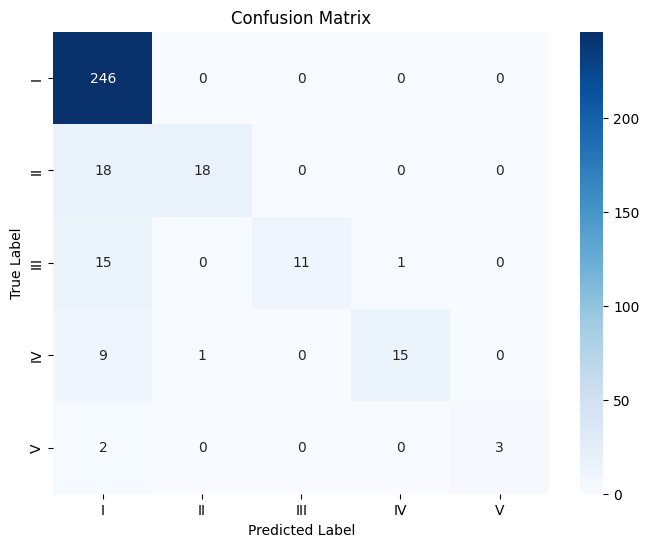

In [ ]:
print("Confusion Matrix with Train Data:-")
plot_confusion_matrix(y_train, y_train_pred,'Confusion Matrix Train Data',plt.cm.Blues,best_classifier)

Confusion Matrix with Test Data:-


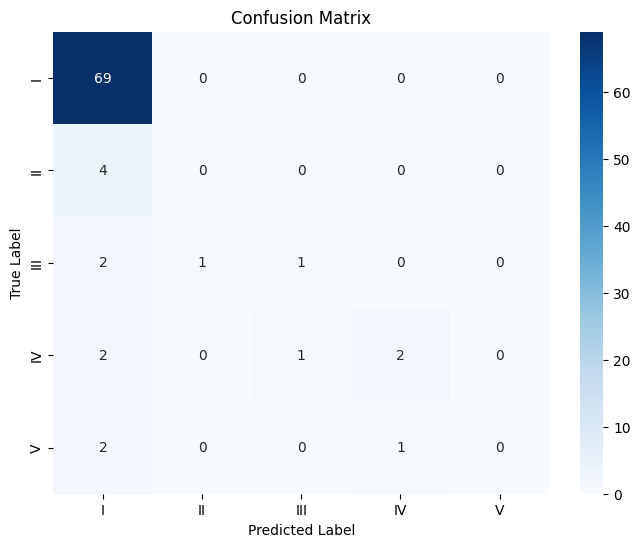

In [ ]:
print("Confusion Matrix with Test Data:-")
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)

#### Conclusion on Model Performance


Train Confusion Matrix Insights:

* High Accuracy on Class 'I': The model is highly accurate in predicting class 'I' (Accident Level I - least severe), as indicated by the large number of correct predictions (True Positives) along the diagonal. This is expected since class 'I' is the most frequent class in the dataset.

* Misclassifications: The model has some misclassifications, particularly with classes 'II', 'III', 'IV', and 'V'. This is evident from the non-zero values in the off-diagonal cells. For instance, some samples belonging to class 'II' are misclassified as 'I' or 'III'.

* Class Imbalance Effect: The confusion matrix reflects the class imbalance in the dataset, with a larger number of predictions skewed towards class 'I'.

Test Confusion Matrix Insights:

* Generalization to Unseen Data: The test confusion matrix shows how the model generalizes to unseen data. The patterns are generally similar to the train confusion matrix, suggesting that the model is not overfitting too severely.

* Slight Drop in Accuracy: There might be a slight drop in accuracy for some classes on the test data compared to the training data. This is expected as the model is evaluated on unseen samples.

* Challenges with Minority Classes: The model might still struggle with predicting the minority classes (II, III, IV, V) accurately, as indicated by the relatively lower number of true positives for these classes.
Overall Insights and Recommendations:


Model Performance:

* The model seems to perform well overall, particularly in predicting the majority class ('I'). However, there's room for improvement in predicting the minority classes.
* To improve the model performance over the minority class we can opt for the synthetic data generation.
* Along with synthetic data generation instead of BOW or TF-IDF we can definitely try LLM's



### ANN

#### Base ANN

In [53]:
X = final_df_TFIDF.drop('Accident Level', axis=1)  # Features
y = final_df_TFIDF['Accident Level']  # Target variable

In [54]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [55]:
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_encoded, num_classes=5)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42,stratify=y)

In [57]:
# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax')) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=1)

# fit the keras model on the dataset
training_history = model.fit(X_train,
                             y_train,
                             epochs=50,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test),
                             callbacks=[reduce_lr, early_stopping])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - categorical_accuracy: 0.2029 - loss: 1.8172 - val_categorical_accuracy: 0.7412 - val_loss: 1.3935 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3331 - loss: 1.6970 - val_categorical_accuracy: 0.7412 - val_loss: 1.2342 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.4894 - loss: 1.3733 - val_categorical_accuracy: 0.7412 - val_loss: 1.1442 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.6219 - loss: 1.1663 - val_categorical_accuracy: 0.7412 - val_loss: 1.0626 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.6619 - loss: 1.1198 - val_categorical_accuracy: 0.7412 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7321 - loss: 0.9873 - val_categorical_accuracy: 0.7

##### Model Performance

Text(0.5, 1.0, 'Training and validation loss')

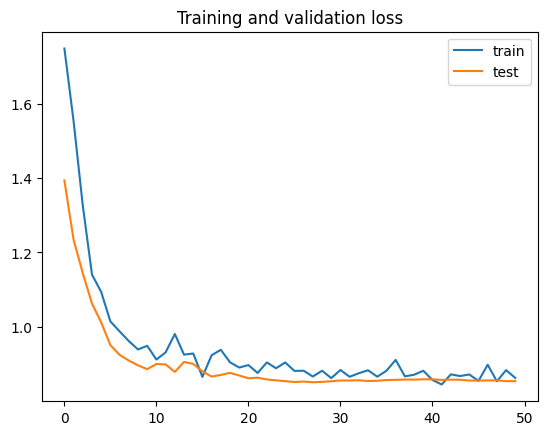

In [58]:
# plot train vs validation loss
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

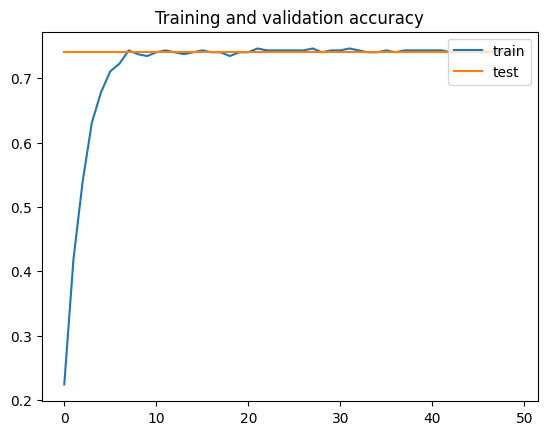

In [59]:
# plot train vs validation accuracy
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [60]:
# Classification Report
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels
y_pred_probs = model.predict(X_test)  # Get model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_true, y_pred)

print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        85
weighted avg       0.55      0.74      0.63        85



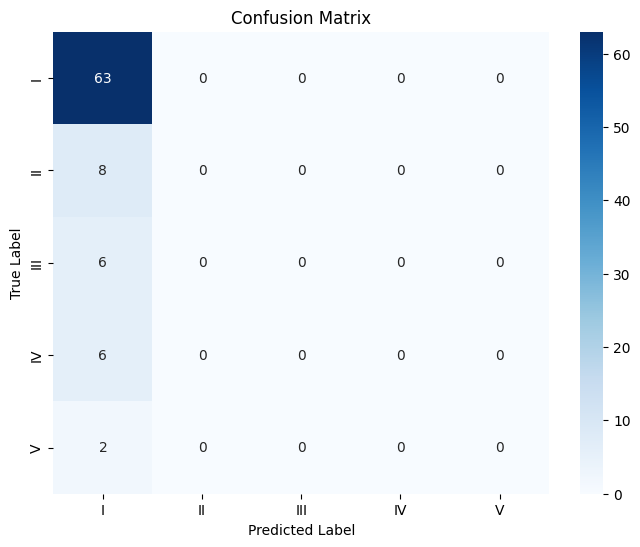

In [63]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)

In [64]:
print(recall_score(y_true, y_pred, average='macro'),
      precision_score(y_true, y_pred, average='macro'),
      f1_score(y_true, y_pred, average='macro')
)

0.2 0.14823529411764708 0.17027027027027025


Insights -
* Train Loss and Validation Loss converge at the end of 50 epochs
* Train and Validation Accuracy converge at the end of 50 epochs
* At the end of 50 epochs Train and Validation Categorical Accuracy is ~=75%
* From Classification and confusion matrix it is evident that ANN is able to predict the majority class and it misclassifies minority class to majority class

##### Performance Improvement Meausres
1. Find the Best Probability Threshold for each class and apply them.
2. Group the accident levels into Minor, Major and Severe category and then train ANN to predict only 3 accident levels instead of 5.

#### Probability Threshold Adjustment

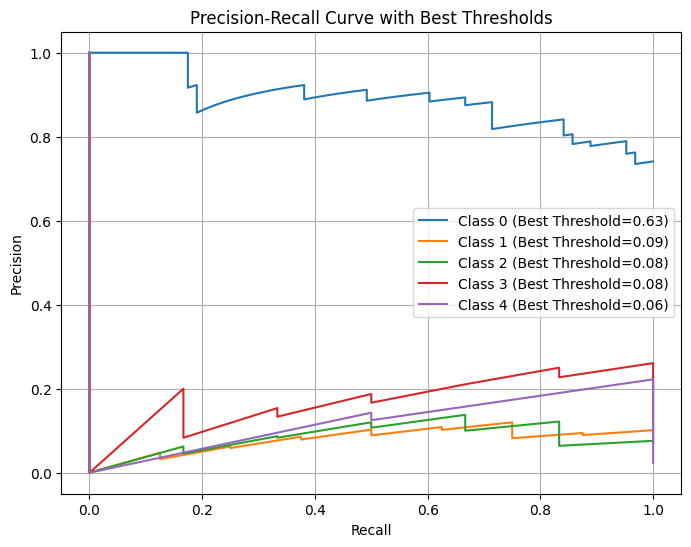

Best Thresholds per Class: {0: 0.6278413, 1: 0.091028854, 2: 0.07933525, 3: 0.07694735, 4: 0.05966801}


In [65]:
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

# Store best thresholds per class
best_thresholds = {}

plt.figure(figsize=(8, 6))
for i in range(y_pred_probs.shape[1]):  # Loop through each class
    precision, recall, thresholds = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])

    # Compute F1-score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

    # Get threshold with highest F1-score
    best_idx = np.argmax(f1_scores)
    best_thresholds[i] = thresholds[best_idx]

    # Plot PR curve
    plt.plot(recall, precision, label=f'Class {i} (Best Threshold={best_thresholds[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Best Thresholds")
plt.legend()
plt.grid()
plt.show()

print("Best Thresholds per Class:", best_thresholds)


In [66]:
# Convert probabilities into final predictions based on optimized thresholds
y_pred_adjusted = np.zeros_like(y_pred_probs.argmax(axis=1))  # Initialize predictions

for i in range(y_pred_probs.shape[1]):  # Loop through each class
    y_pred_adjusted[y_pred_probs[:, i] > best_thresholds[i]] = i  # Apply custom threshold

print("Adjusted Predictions:", y_pred_adjusted)

Adjusted Predictions: [3 0 1 0 2 0 0 0 2 1 3 3 1 2 1 1 1 0 1 4 1 2 0 0 0 0 1 1 0 0 1 0 4 0 0 3 1
 1 2 4 0 0 4 3 1 4 0 3 4 1 3 0 0 3 1 2 0 0 0 0 0 4 1 0 3 4 1 0 3 3 0 0 2 3
 0 0 3 0 0 0 0 1 0 3 1]


In [67]:
print(classification_report(y_true, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        63
           1       0.15      0.38      0.21         8
           2       0.14      0.17      0.15         6
           3       0.29      0.67      0.40         6
           4       0.12      0.50      0.20         2

    accuracy                           0.46        85
   macro avg       0.31      0.44      0.31        85
weighted avg       0.66      0.46      0.51        85



##### Insights -
Even though probability thresholds were adjusted for Best Precision and Recall the ANN has macro f1 score of 23% and weighted f1 score of 48% only.

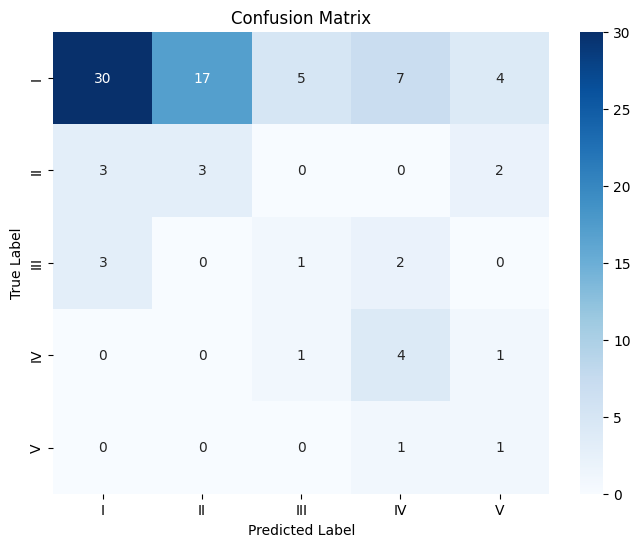

In [69]:
plot_confusion_matrix(y_true, y_pred_adjusted,'Confusion Matrix with adjusted prediction',plt.cm.Blues,best_classifier)

In [71]:
print(recall_score(y_true, y_pred_adjusted, average='macro'),
      precision_score(y_true, y_pred_adjusted, average='macro'),
      f1_score(y_true, y_pred_adjusted, average='macro')
)

0.43690476190476185 0.30738095238095237 0.31483849483849485


### Grouping the accident levels

In [72]:
# Only three accident levels
level_mapping = {'I': 0, 'II': 1, 'III': 1, 'IV': 1, 'V': 2}
df_ann = final_df_TFIDF.copy()
df_ann['Accident Level'] = df_ann['Accident Level'].map(level_mapping)

In [73]:
df_ann['Accident Level'].value_counts()

,count
Accident Level,
0,315
1,101
2,8


In [74]:
X = df_ann.drop('Accident Level', axis=1)  # Features
y = df_ann['Accident Level']  # Target variable

In [75]:
y_categorical = to_categorical(y, num_classes=3)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42,stratify=y)

In [77]:
# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax')) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=1)

# fit the keras model on the dataset
training_history = model.fit(X_train,
                             y_train,
                             epochs=50,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test),
                             callbacks=[reduce_lr, early_stopping])





Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - categorical_accuracy: 0.3573 - loss: 1.3398 - val_categorical_accuracy: 0.7529 - val_loss: 0.9544 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.4924 - loss: 1.0188 - val_categorical_accuracy: 0.7412 - val_loss: 0.8651 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.6535 - loss: 0.8215 - val_categorical_accuracy: 0.7412 - val_loss: 0.8092 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.6637 - loss: 0.8527 - val_categorical_accuracy: 0.7412 - val_loss: 0.7528 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.6390 - loss: 0.9082 - val_categorical_accuracy: 0.7412 - val_loss: 0.7140 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7482 - loss: 0.7269 - val_categorical_accuracy: 0.741

Text(0.5, 1.0, 'Training and validation loss')

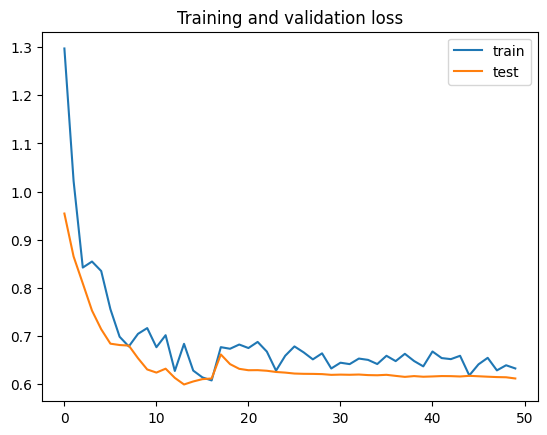

In [78]:
# plot train vs validation loss
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

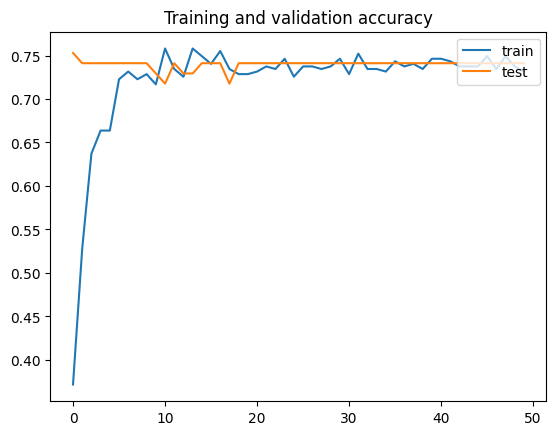

In [79]:
# plot train vs validation accuracy
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [80]:
# Classification Report
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels
y_pred_probs = model.predict(X_test)  # Get model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_true, y_pred)

print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.25      0.33      0.28        85
weighted avg       0.55      0.74      0.63        85



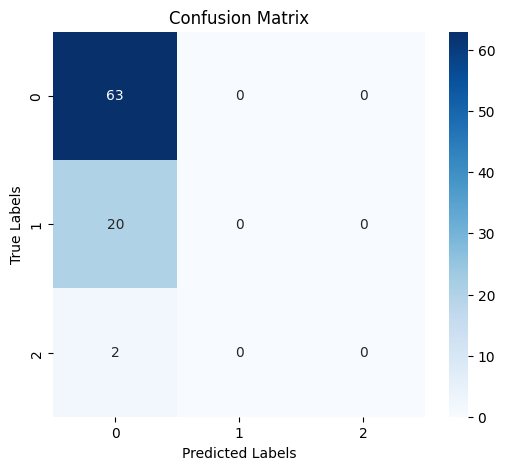

In [82]:
# plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [83]:
print(recall_score(y_true, y_pred, average='macro'),
      precision_score(y_true, y_pred, average='macro'),
      f1_score(y_true, y_pred, average='macro')
)

0.3333333333333333 0.24705882352941178 0.28378378378378377


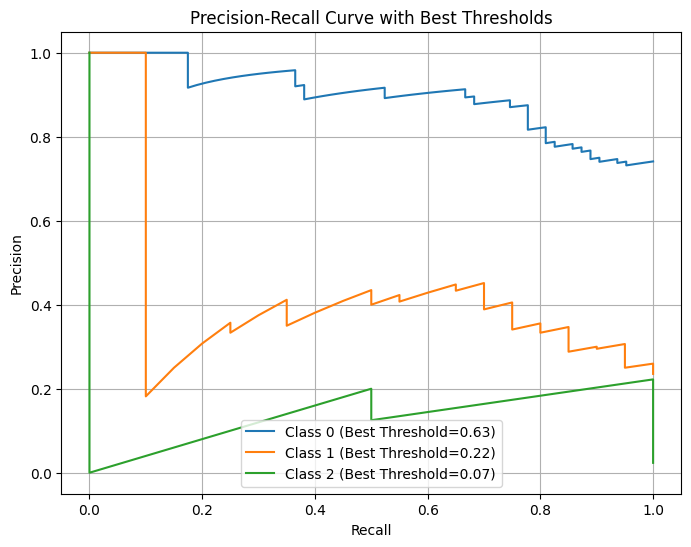

Best Thresholds per Class: {0: 0.62677616, 1: 0.22262193, 2: 0.06643034}


In [84]:
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

# Store best thresholds per class
best_thresholds = {}

plt.figure(figsize=(8, 6))
for i in range(y_pred_probs.shape[1]):  # Loop through each class
    precision, recall, thresholds = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])

    # Compute F1-score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

    # Get threshold with highest F1-score
    best_idx = np.argmax(f1_scores)
    best_thresholds[i] = thresholds[best_idx]

    # Plot PR curve
    plt.plot(recall, precision, label=f'Class {i} (Best Threshold={best_thresholds[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Best Thresholds")
plt.legend()
plt.grid()
plt.show()

print("Best Thresholds per Class:", best_thresholds)


In [85]:
# Convert probabilities into final predictions based on optimized thresholds
y_pred_adjusted = np.zeros_like(y_pred_probs.argmax(axis=1))  # Initialize predictions

for i in range(y_pred_probs.shape[1]):  # Loop through each class
    y_pred_adjusted[y_pred_probs[:, i] > best_thresholds[i]] = i  # Apply custom threshold

print("Adjusted Predictions:", y_pred_adjusted)

Adjusted Predictions: [0 1 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 2 1 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 2 0 0 2 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 2 0 0 2 1 2 0 0 2]


In [86]:
print(classification_report(y_true, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        63
           1       0.59      0.65      0.62        20
           2       0.12      0.50      0.20         2

    accuracy                           0.72        85
   macro avg       0.52      0.63      0.54        85
weighted avg       0.78      0.72      0.74        85



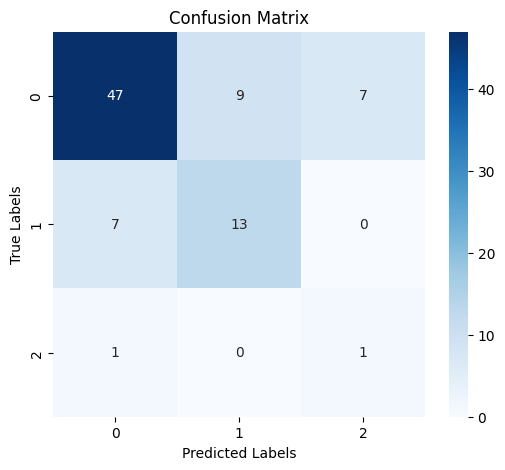

In [87]:
# plot confusion matrix
cm = confusion_matrix(y_true, y_pred_adjusted)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [88]:
print(recall_score(y_true, y_pred_adjusted, average='macro'),
      precision_score(y_true, y_pred_adjusted, average='macro'),
      f1_score(y_true, y_pred_adjusted, average='macro')
)

0.632010582010582 0.5234848484848484 0.5385525961797148


##### Insights -
1. When accident levels were grouped into 3 instead of 5 and probability threshold were adjusted for best recall and precision the macro f1 score was increased to 40%
2. With this approach obviously there will be information loss as accident level were grouped
3. Even though accident levels were grouped to mitigate the class imabalce ANN model is still not able to classify the severe accidents and from the industry point of view classifying the severe accident levels is most important.
4. We can try to imporve the results using LSTM Neural Networks or LLM's

# LSTM

In [35]:
#Fucnction to plot learning curve and accuracy curve
def plot_training_history(training_history):
    epochs = range(len(training_history.history['loss']))  # Get number of epochs

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss learning curves
    ax1.plot(epochs, training_history.history['loss'], label='Train Loss')
    ax1.plot(epochs, training_history.history['val_loss'], label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    # Plot accuracy learning curves
    ax2.plot(epochs, training_history.history['categorical_accuracy'], label='Train Accuracy')
    ax2.plot(epochs, training_history.history['val_categorical_accuracy'], label='Validation Accuracy')
    ax2.legend(loc='upper right')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')

    # Display the plots
    plt.show()

In [121]:
#1. Separate features (X) and target (y)
X = encoded_df['Processed Description'].values
y = encoded_df['Accident Level'].values

# 2. Encode Target Variable:
# Encode the target variable 'Accident Level' using LabelEncoder and then to_categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)  # One-hot encode the target

# 3. Tokenize and Pad Sequences: Tokenize the text data and pad sequences to a fixed length

# Create a tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Adjust num_words as needed
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to a fixed length
max_length = 500  # Adjust max_length as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 4. Split Data:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [122]:
# 5. Base Build LSTM Model: Create an LSTM model architecture
model_base = Sequential()
model_base.add(Embedding(5000, 128, input_length=max_length)) # Adjust embedding dimensions as needed
model_base.add(LSTM(64)) # Adjust LSTM units as needed
model_base.add(Dropout(0.2)) # Adjust dropout rate as needed
model_base.add(Dense(y_train.shape[1], activation='softmax')) # Output layer with softmax for multi-class

# 6. Compile Model: Compile the model with an appropriate optimizer, loss function, and metrics
model_base.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# 7. Train Model: Train the model using the training data

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=1)

# fit the keras model on the dataset
training_history_base = model_base.fit(X_train,
                             y_train,
                             epochs=50,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test),
                             callbacks=[reduce_lr, early_stopping])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - categorical_accuracy: 0.7163 - loss: 1.1833 - val_categorical_accuracy: 0.8118 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.7061 - loss: 1.0039 - val_categorical_accuracy: 0.8118 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.7051 - loss: 0.9749 - val_categorical_accuracy: 0.8118 - val_loss: 0.7787 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.7603 - loss: 0.8723 - val_categorical_accuracy: 0.8118 - val_loss: 0.7908 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - categorical_accuracy: 0.7228 - loss: 0.9379 - val_categorical_accuracy: 0.8118 - val_loss: 0.7821 - learning_rate: 0.0010
Epoch 6/50
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.7208 - loss: 0.9502
Epoch 6: ReduceLROnPlateau r

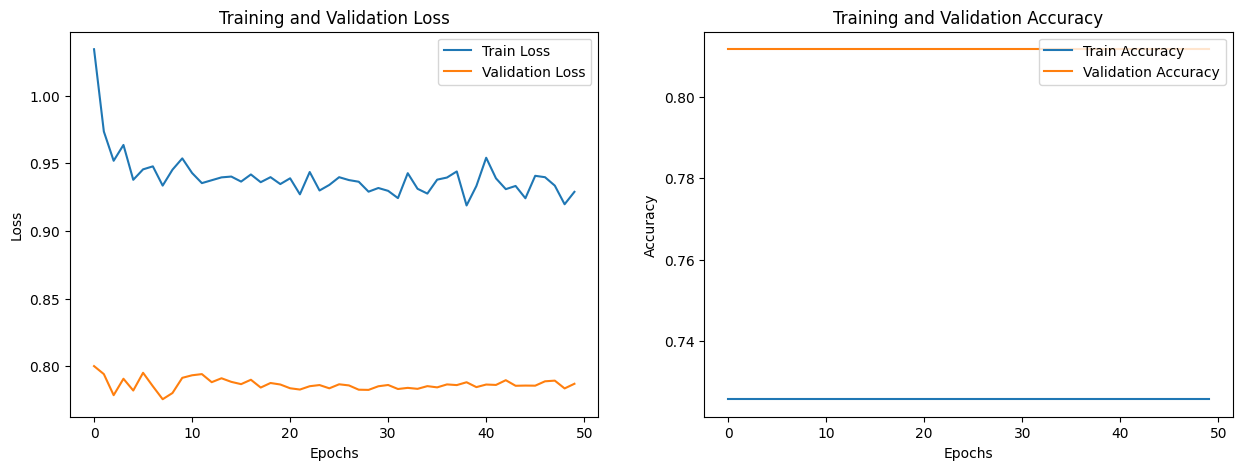

In [128]:
plot_training_history(training_history_base)

In [129]:
# Evaluate the model's performance on the testing data
loss, accuracy = model_base.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.7871
Test Accuracy: 0.8118


In [130]:
# Classification Report
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels
y_pred_probs = model.predict(X_test)  # Get model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)
report = classification_report(y_true, y_pred)
print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        69
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.78        85
   macro avg       0.17      0.19      0.18        85
weighted avg       0.68      0.78      0.72        85



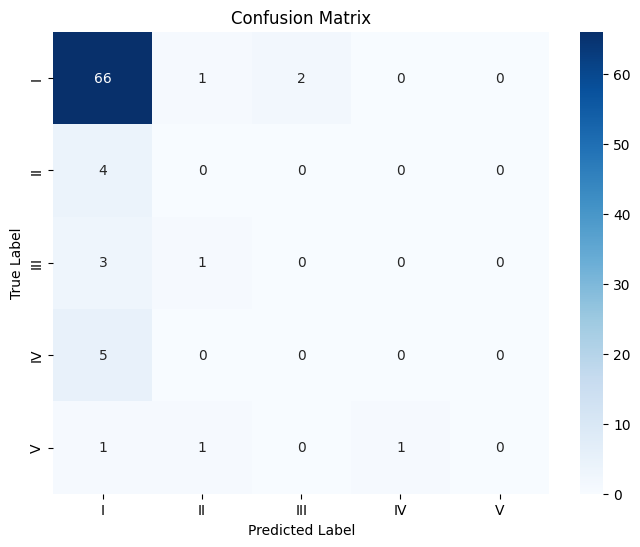

In [132]:
plot_confusion_matrix(y_true, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)



*   From above result it is evident that training and validation loss/accuracy are not converging even after 50 epoch.
*   Result of this model still doing well on major class I but not performing good with minor class (II, III, IV and V)



In [133]:
# Let's try to optimize the LSTM Model with Batch Normalization and adding more dense layer
model_lstm_v2 = Sequential()
model_lstm_v2.add(Embedding(5000, 128, input_length=max_length))
model_lstm_v2.add(LSTM(64))
model_lstm_v2.add(Dropout(0.2))
model_lstm_v2.add(BatchNormalization())  # Batch Normalization after LSTM
model_lstm_v2.add(Dense(128, activation='relu'))  # Additional dense layer with ReLU activation
model_lstm_v2.add(Dropout(0.2))  # Dropout after dense layer
model_lstm_v2.add(BatchNormalization())  # Batch Normalization after dense layer
model_lstm_v2.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# 6. Compile Model: Compile the model with an appropriate optimizer, loss function, and metrics
model_lstm_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# 7. Train Model: Train the model using the training data

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=1)

# fit the keras model on the dataset
training_history_v2 = model_lstm_v2.fit(X_train,
                             y_train,
                             epochs=50,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test),
                             callbacks=[reduce_lr, early_stopping])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - categorical_accuracy: 0.2425 - loss: 2.0539 - val_categorical_accuracy: 0.8118 - val_loss: 1.3642 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 0.3091 - loss: 1.7729 - val_categorical_accuracy: 0.8118 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.4576 - loss: 1.3613 - val_categorical_accuracy: 0.8118 - val_loss: 0.9275 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.5511 - loss: 1.3143 - val_categorical_accuracy: 0.8118 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.5866 - loss: 1.2386 - val_categorical_accuracy: 0.8118 - val_loss: 0.7556 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.6460 - loss: 1.2188 - val_categorical_accuracy: 

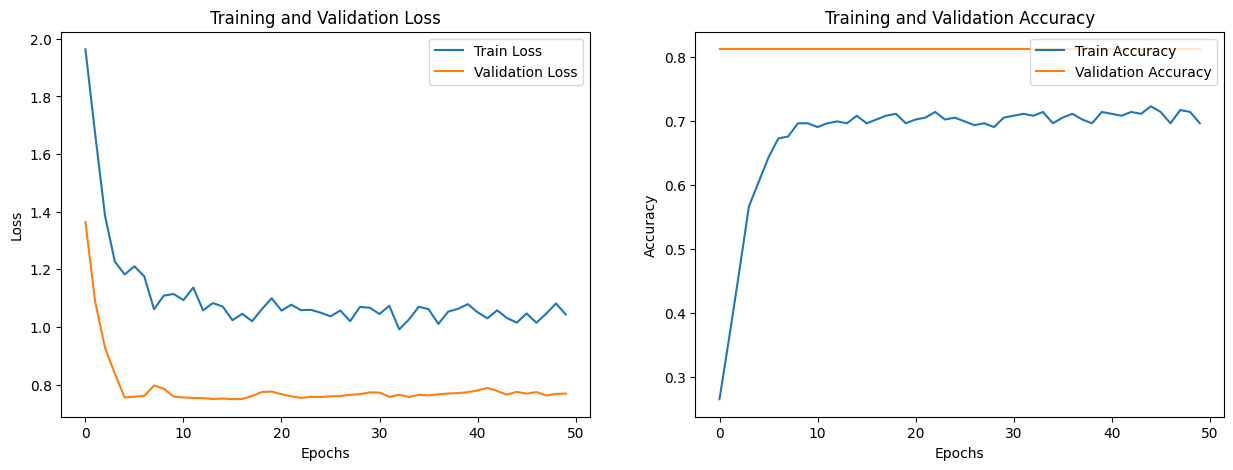

In [134]:
plot_training_history(training_history_v2)

In [135]:
# 8Evaluate the model's performance on the testing data
loss, accuracy = model_lstm_v2.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.7687
Test Accuracy: 0.8118


In [138]:
# Classification Report
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels
y_pred_probs = model_lstm_v2.predict(X_test)  # Get model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)
report = classification_report(y_true, y_pred)
print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        69
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.81        85
   macro avg       0.16      0.20      0.18        85
weighted avg       0.66      0.81      0.73        85



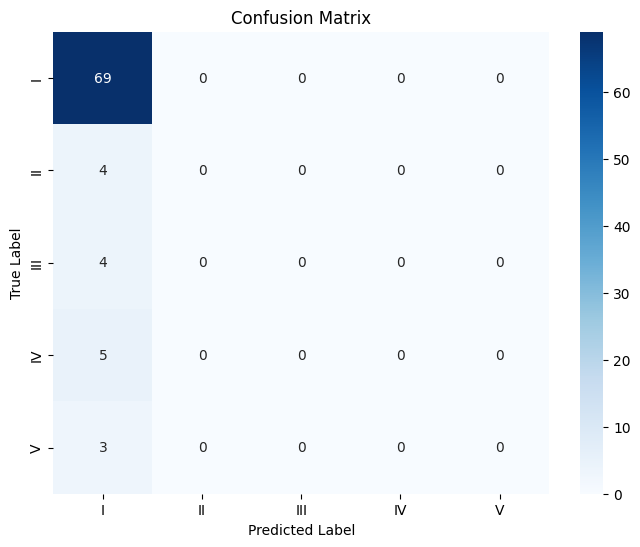

In [139]:
plot_confusion_matrix(y_true, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)

In [145]:
# Let's try to optimize with bidirectional LSTM Model with Batch Normalization and adding more dense layer
model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Embedding(5000, 128, input_length=max_length))
model_lstm_bidirectional.add(Bidirectional(LSTM(64, return_sequences=True)))
model_lstm_bidirectional.add(Dropout(0.3))
model_lstm_bidirectional.add(BatchNormalization())
model_lstm_bidirectional.add(Bidirectional(LSTM(64)))
model_lstm_bidirectional.add(Dropout(0.3))
model_lstm_bidirectional.add(BatchNormalization())
model_lstm_bidirectional.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_lstm_bidirectional.add(Dropout(0.3))
model_lstm_bidirectional.add(BatchNormalization())
model_lstm_bidirectional.add(Dense(y_train.shape[1], activation='softmax'))

# 6. Compile Model: Compile the model with an appropriate optimizer, loss function, and metrics
model_lstm_bidirectional.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# 7. Train Model: Train the model using the training data

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=1)

# fit the keras model on the dataset
training_history_v3 = model_lstm_bidirectional.fit(X_train,
                             y_train,
                             epochs=10,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test),
                             callbacks=[reduce_lr, early_stopping])

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - categorical_accuracy: 0.2104 - loss: 3.4038 - val_categorical_accuracy: 0.8118 - val_loss: 2.3370 - learning_rate: 0.0010
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - categorical_accuracy: 0.2831 - loss: 3.0337 - val_categorical_accuracy: 0.8118 - val_loss: 2.0144 - learning_rate: 0.0010
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - categorical_accuracy: 0.4396 - loss: 2.6408 - val_categorical_accuracy: 0.8118 - val_loss: 1.8751 - learning_rate: 0.0010
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - categorical_accuracy: 0.5609 - loss: 2.4463 - val_categorical_accuracy: 0.8118 - val_loss: 1.8324 - learning_rate: 0.0010
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - categorical_accuracy: 0.5992 - loss: 2.2692 - val_categorical_accuracy: 0.8118 - val_loss: 1.7896 - learning_rate: 0.0010
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - categorical_accuracy: 0.7100 - loss: 1.9439 - val_categorical_accuracy:

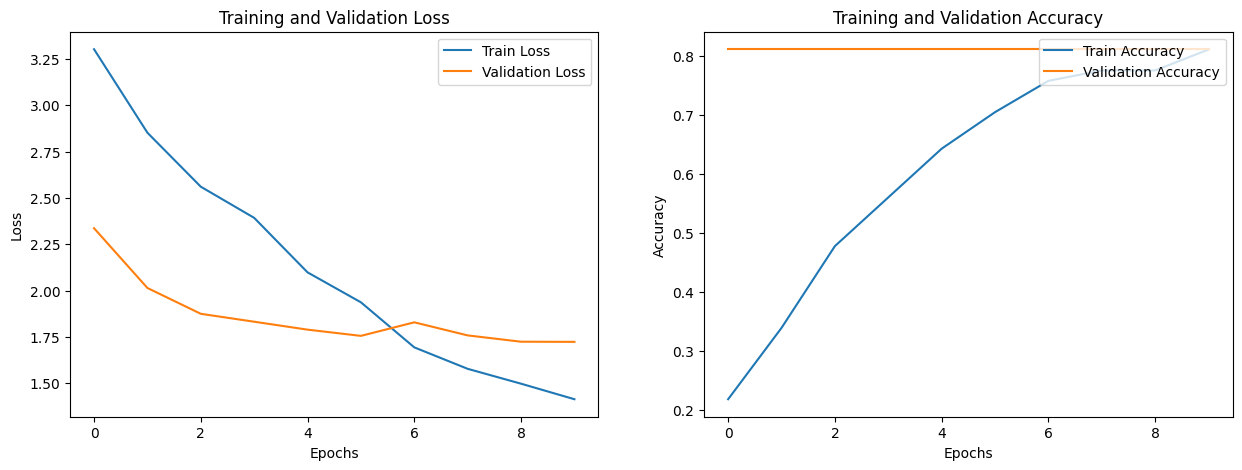

In [146]:
plot_training_history(training_history_v3)

In [147]:
# 8Evaluate the model's performance on the testing data
loss, accuracy = model_lstm_bidirectional.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 1.7237
Test Accuracy: 0.8118


In [148]:
# Classification Report
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels
y_pred_probs = model_lstm_bidirectional.predict(X_test)  # Get model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)
report = classification_report(y_true, y_pred)
print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        69
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.81        85
   macro avg       0.16      0.20      0.18        85
weighted avg       0.66      0.81      0.73        85



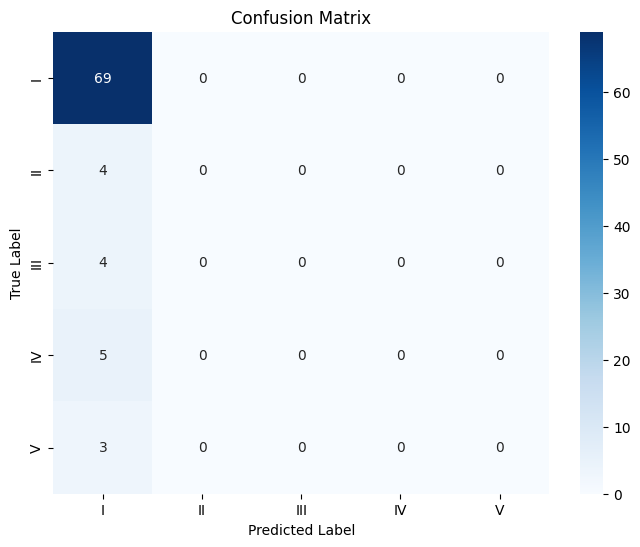

In [149]:
plot_confusion_matrix(y_true, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)

* Training and Validation Loss converged and then separated.
* Training and validation accuracy converged at 10 epoch but seems it would seperate in further epoch.
* Result of this model still doing well on major class I but not performing good with minor class (II, III, IV and V)
* We need to further evaluate if any LLM classification model can improve the classification across all class.

# Transformer based model

In [36]:
# Utilize the processed data frame and get the Description
label_encoder = LabelEncoder()
X = list(encoded_df['Description'])
y = label_encoder.fit_transform(encoded_df['Accident Level'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [38]:
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

271
68
85
271
68
85


In [39]:
! pip install transformers

In [40]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [41]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [42]:
import torch

class AccidentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = AccidentDataset(train_encodings, y_train.tolist() if isinstance(y_train, np.ndarray) else y_train)
val_dataset = AccidentDataset(val_encodings, y_val.tolist() if isinstance(y_val, np.ndarray) else y_val)
test_dataset = AccidentDataset(test_encodings, y_test.tolist() if isinstance(y_test, np.ndarray) else y_test)

In [43]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [45]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",  num_labels=5)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.521000
20,1.486000
30,1.421900
40,1.365200
50,1.237700
60,1.079400
70,0.950800
80,0.892000
90,1.071500
100,0.809200


TrainOutput(global_step=102, training_loss=1.173461847445544, metrics={'train_runtime': 1141.9887, 'train_samples_per_second': 0.712, 'train_steps_per_second': 0.089, 'total_flos': 45647033695830.0, 'train_loss': 1.173461847445544, 'epoch': 3.0})

In [46]:
trainer.evaluate()

{'eval_loss': 0.8781931400299072,
 'eval_runtime': 20.7172,
 'eval_samples_per_second': 3.282,
 'eval_steps_per_second': 0.434,
 'epoch': 3.0}

In [47]:
y_pred = trainer.predict(test_dataset)[1]

In [48]:
trainer.predict(test_dataset)[1]

array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 2, 3, 2, 0, 0, 3, 0, 0, 4, 1, 0, 0, 2, 1, 0, 3, 0])

In [49]:
#classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



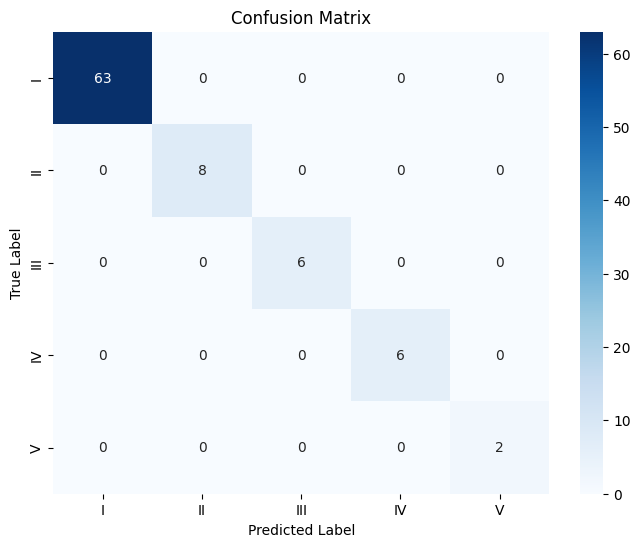

In [59]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,None)



* The macro average for precision, recall, and F1-score is 1.00. This shows that the model performs equally well across all classes when treated with equal importance.

  
* The classification report indicates that this model is performing perfectly on the dataset, correctly classifying all instances with no errors.

* Although the dataset is imbalanced, the model handles all classes exceptionally well.

* These results suggest that the model is highly effective for this specific task and dataset.

